# WORKING DOC

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'str'>
Kraken secren data type: <class 'str'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [4]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['LINK/AUD']['symbol']
# crypto_details

'LINK/AUD'

### Fetch Historical Data for LINK/USDT
Note: Other options include ADA, BCH, DAI, DOT, EOS, ETH, LINK, LTC, USDC, BTC, DOGE and XRP

In [5]:
# Fetch daily candlestick bar data from `LINK/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620705600000, 45.24759, 45.97226, 45.24759, 45.89703, 1565.89548198]

In [6]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume
0  1620698400000  46.50646  46.95368  45.58284  45.64364  1144.980905
1  1620702000000  45.61936  46.18534  44.92075  45.12087  1090.026507
2  1620705600000  45.24759  45.97226  45.24759  45.89703  1565.895482
3  1620709200000  45.92392  46.16521  44.82914  45.18302   748.043652
4  1620712800000  45.33245  46.30187  45.33245  46.22390   898.658697

'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [7]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume  \
0  1620698400000  46.50646  46.95368  45.58284  45.64364  1144.980905   
1  1620702000000  45.61936  46.18534  44.92075  45.12087  1090.026507   
2  1620705600000  45.24759  45.97226  45.24759  45.89703  1565.895482   
3  1620709200000  45.92392  46.16521  44.82914  45.18302   748.043652   
4  1620712800000  45.33245  46.30187  45.33245  46.22390   898.658697   

                 date  
0 2021-05-11 02:00:00  
1 2021-05-11 03:00:00  
2 2021-05-11 04:00:00  
3 2021-05-11 05:00:00  
4 2021-05-11 06:00:00

'_________________________'

'historical_prices_df shape: (720, 7)'

In [8]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 02:00:00  1620698400000  46.50646  46.95368  45.58284  45.64364   
2021-05-11 03:00:00  1620702000000  45.61936  46.18534  44.92075  45.12087   
2021-05-11 04:00:00  1620705600000  45.24759  45.97226  45.24759  45.89703   
2021-05-11 05:00:00  1620709200000  45.92392  46.16521  44.82914  45.18302   
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
...                            ...       ...       ...       ...       ...   
2021-06-09 21:00:00  1623272400000  24.79071  25.13388  24.77349  25.09464   
2021-06-09 22:00:00  1623276000000  25.13388  25.48122  25.13388  25.39884   
2021-06-09 23:00:00  1623279600000  25.39572  25.47377  25.26640  25.45000   
2021-06-10 00:00:00  1623283200000  25.60268  25.70171  25.03294  25.05017   
2021-06-10 01:00:00  1623286800000  25.41931  25.45095  25.19347  25.19347   

                          volume                date  
date                                                  
2021-05-11 02:00:00  1144.980905 2021-05-11 02:00:00  
2021-05-11 03:00:00  1090.026507 2021-05-11 03:00:00  
2021-05-11 04:00:00  1565.895482 2021-05-11 04:00:00  
2021-05-11 05:00:00   748.043652 2021-05-11 05:00:00  
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00  
...                          ...                 ...  
2021-06-09 21:00:00  1136.139988 2021-06-09 21:00:00  
2021-06-09 22:00:00   545.841559 2021-06-09 22:00:00  
2021-06-09 23:00:00   924.331112 2021-06-09 23:00:00  
2021-06-10 00:00:00  2059.138769 2021-06-10 00:00:00  
2021-06-10 01:00:00   557.819860 2021-06-10 01:00:00  

[720 rows x 7 columns]

### Plot Daily Returns

In [9]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 03:00:00  1620702000000  45.61936  46.18534  44.92075  45.12087   
2021-05-11 04:00:00  1620705600000  45.24759  45.97226  45.24759  45.89703   
2021-05-11 05:00:00  1620709200000  45.92392  46.16521  44.82914  45.18302   
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   
...                            ...       ...       ...       ...       ...   
2021-06-09 21:00:00  1623272400000  24.79071  25.13388  24.77349  25.09464   
2021-06-09 22:00:00  1623276000000  25.13388  25.48122  25.13388  25.39884   
2021-06-09 23:00:00  1623279600000  25.39572  25.47377  25.26640  25.45000   
2021-06-10 00:00:00  1623283200000  25.60268  25.70171  25.03294  25.05017   
2021-06-10 01:00:00  1623286800000  25.41931  25.45095  25.19347  25.19347   

                          volume                date  daily_return  
date                                                                
2021-05-11 03:00:00  1090.026507 2021-05-11 03:00:00     -0.011453  
2021-05-11 04:00:00  1565.895482 2021-05-11 04:00:00      0.017202  
2021-05-11 05:00:00   748.043652 2021-05-11 05:00:00     -0.015557  
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  
...                          ...                 ...           ...  
2021-06-09 21:00:00  1136.139988 2021-06-09 21:00:00      0.010372  
2021-06-09 22:00:00   545.841559 2021-06-09 22:00:00      0.012122  
2021-06-09 23:00:00   924.331112 2021-06-09 23:00:00      0.002014  
2021-06-10 00:00:00  2059.138769 2021-06-10 00:00:00     -0.015710  
2021-06-10 01:00:00   557.819860 2021-06-10 01:00:00      0.005721  

[719 rows x 8 columns]

### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [10]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 03:00:00  1620702000000  45.61936  46.18534  44.92075  45.12087   
2021-05-11 04:00:00  1620705600000  45.24759  45.97226  45.24759  45.89703   
2021-05-11 05:00:00  1620709200000  45.92392  46.16521  44.82914  45.18302   
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 03:00:00  1090.026507 2021-05-11 03:00:00     -0.011453  45.120870   
2021-05-11 04:00:00  1565.895482 2021-05-11 04:00:00      0.017202  45.523887   
2021-05-11 05:00:00   748.043652 2021-05-11 05:00:00     -0.015557  45.401410   
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  45.631360   
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  45.786167   

                        EMA_20     EMA_50    EMA_200  crossover_long_9v20  \
date                                                                        
2021-05-11 03:00:00  45.120870  45.120870  45.120870                  0.0   
2021-05-11 04:00:00  45.515674  45.511640  45.509622                  1.0   
2021-05-11 05:00:00  45.400925  45.400578  45.400377                  1.0   
2021-05-11 06:00:00  45.617485  45.610708  45.607330                  1.0   
2021-05-11 07:00:00  45.763361  45.752177  45.746592                  1.0   

                     crossover_short_9v20  crossover_signal_9v20  \
date                                                               
2021-05-11 03:00:00                   0.0                    0.0   
2021-05-11 04:00:00                   0.0                    1.0   
2021-05-11 05:00:00                   0.0                    1.0   
2021-05-11 06:00:00                   0.0                    1.0   
2021-05-11 07:00:00                   0.0                    1.0   

                     crossover_long_50v200  crossover_short_50v200  \
date                                                                 
2021-05-11 03:00:00                    0.0                     0.0   
2021-05-11 04:00:00                    1.0                     0.0   
2021-05-11 05:00:00                    1.0                     0.0   
2021-05-11 06:00:00                    1.0                     0.0   
2021-05-11 07:00:00                    1.0                     0.0   

                     crossover_signal_50v200  
date                                          
2021-05-11 03:00:00                      0.0  
2021-05-11 04:00:00                      1.0  
2021-05-11 05:00:00                      1.0  
2021-05-11 06:00:00                      1.0  
2021-05-11 07:00:00                      1.0

In [11]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

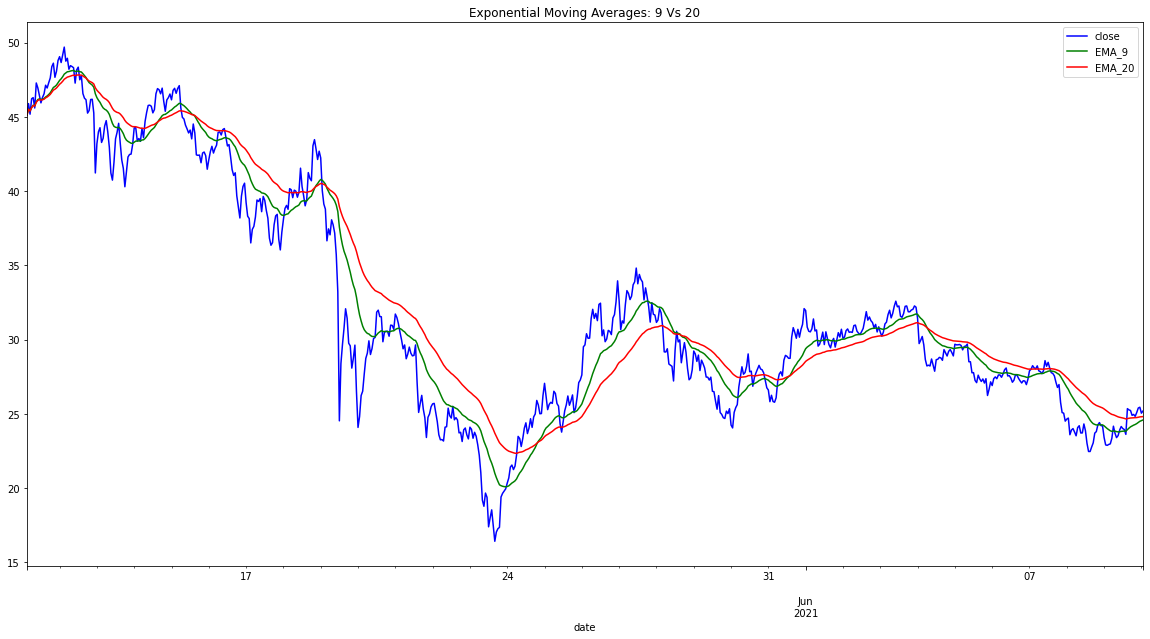

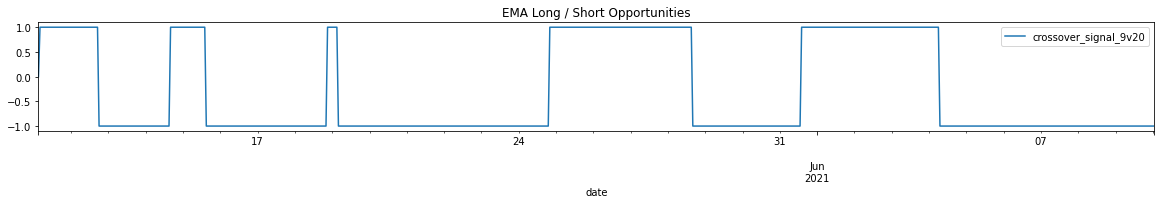

In [12]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])
plt.title('Exponential Moving Averages: 9 Vs 20');
historical_prices_df[['crossover_signal_9v20']].plot(figsize=(20,2))
plt.title('EMA Long / Short Opportunities');

In [13]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

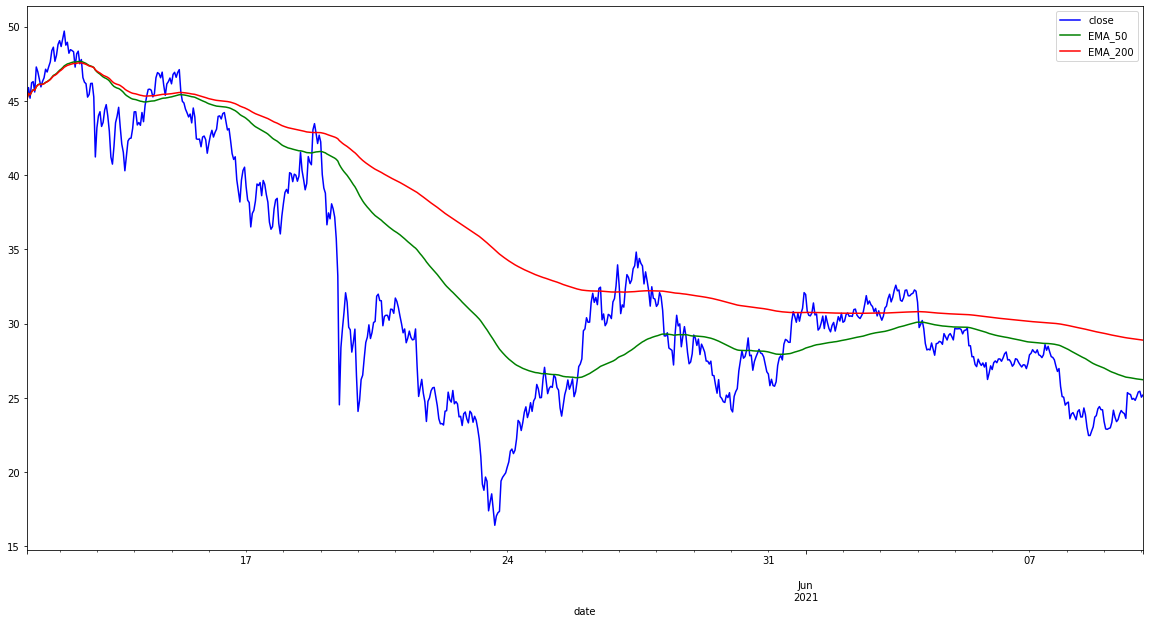

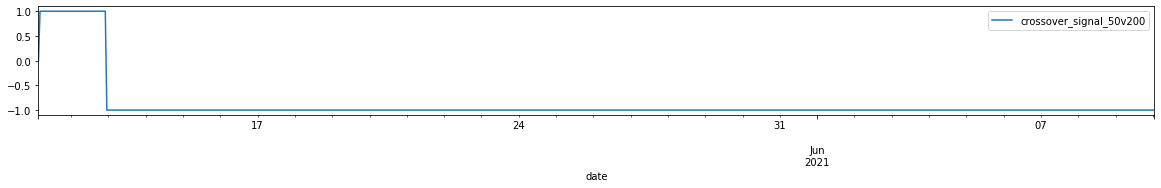

In [14]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])
historical_prices_df[['crossover_signal_50v200']].plot(figsize=(20,2))

<AxesSubplot:xlabel='date'>

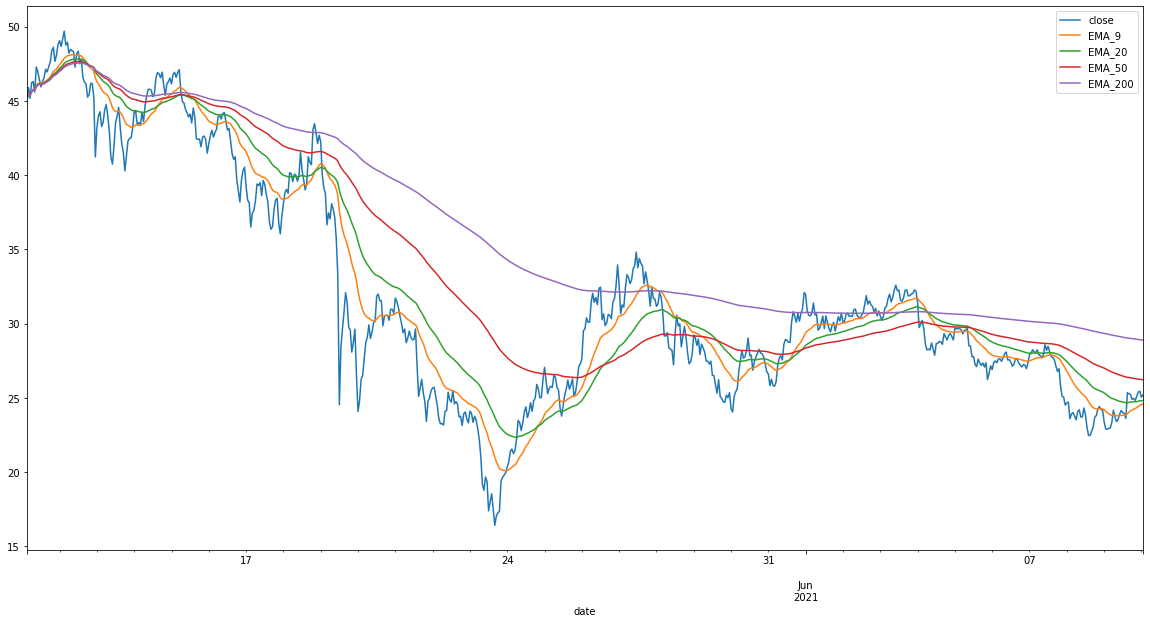

In [15]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [16]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

timestamp      open      high       low     close  \
date                                                                         
2021-05-13 05:00:00  1620882000000  44.20495  44.51789  44.20495  44.38671   
2021-05-13 06:00:00  1620885600000  44.52220  44.76199  44.20670  44.74971   
2021-05-13 07:00:00  1620889200000  44.72155  44.72345  43.90662  43.99000   
2021-05-13 08:00:00  1620892800000  44.03918  44.11004  42.95477  42.95477   
2021-05-13 09:00:00  1620896400000  42.99405  43.10209  40.29654  41.22402   
2021-05-13 10:00:00  1620900000000  41.21522  42.39209  40.65451  40.74371   
2021-05-13 11:00:00  1620903600000  40.49668  42.41006  40.31639  41.95278   
2021-05-13 12:00:00  1620907200000  42.42302  43.52829  42.12820  43.52829   
2021-05-13 13:00:00  1620910800000  43.65489  44.52220  43.10250  43.96705   
2021-05-13 14:00:00  1620914400000  44.33336  44.58647  44.18691  44.56894   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-13 05:00:00   300.386226 2021-05-13 05:00:00      0.019092  45.517408   
2021-05-13 06:00:00   275.277816 2021-05-13 06:00:00      0.008178  45.459446   
2021-05-13 07:00:00   931.408022 2021-05-13 07:00:00     -0.016977  45.348653   
2021-05-13 08:00:00   568.164669 2021-05-13 08:00:00     -0.023533  45.168389   
2021-05-13 09:00:00  6354.109347 2021-05-13 09:00:00     -0.040292  44.871720   
2021-05-13 10:00:00  3070.201615 2021-05-13 10:00:00     -0.011651  44.561576   
2021-05-13 11:00:00  2997.247357 2021-05-13 11:00:00      0.029675  44.365770   
2021-05-13 12:00:00  1255.346740 2021-05-13 12:00:00      0.037554  44.302970   
2021-05-13 13:00:00  6481.230812 2021-05-13 13:00:00      0.010080  44.277802   
2021-05-13 14:00:00  3002.935345 2021-05-13 14:00:00      0.013690  44.299598   

                        EMA_20  ...  crossover_long_50v200  \
date                            ...                          
2021-05-13 05:00:00  46.242826  ...                    0.0   
2021-05-13 06:00:00  46.181919  ...                    0.0   
2021-05-13 07:00:00  46.093104  ...                    0.0   
2021-05-13 08:00:00  45.966757  ...                    0.0   
2021-05-13 09:00:00  45.776993  ...                    0.0   
2021-05-13 10:00:00  45.576795  ...                    0.0   
2021-05-13 11:00:00  45.433469  ...                    0.0   
2021-05-13 12:00:00  45.358533  ...                    0.0   
2021-05-13 13:00:00  45.304088  ...                    0.0   
2021-05-13 14:00:00  45.275469  ...                    0.0   

                     crossover_short_50v200  crossover_signal_50v200  \
date                                                                   
2021-05-13 05:00:00                    -1.0                     -1.0   
2021-05-13 06:00:00                    -1.0                     -1.0   
2021-05-13 07:00:00                    -1.0                     -1.0   
2021-05-13 08:00:00                    -1.0                     -1.0   
2021-05-13 09:00:00                    -1.0                     -1.0   
2021-05-13 10:00:00                    -1.0                     -1.0   
2021-05-13 11:00:00                    -1.0                     -1.0   
2021-05-13 12:00:00                    -1.0                     -1.0   
2021-05-13 13:00:00                    -1.0                     -1.0   
2021-05-13 14:00:00                    -1.0                     -1.0   

                     bollinger_mid_band  bollinger_std  bollinger_upper_band  \
date                                                                           
2021-05-13 05:00:00           45.514485       1.894269             47.408754   
2021-05-13 06:00:00           45.388146       1.854410             47.242556   
2021-05-13 07:00:00           45.179120       1.757350             46.936471   
2021-05-13 08:00:00           44.909352       1.656156             46.565508   
2021-05-13 09:00:00      

### Plot Bollinger Bands

Text(0.5, 1.0, 'Bollinger Band Trading Signals')

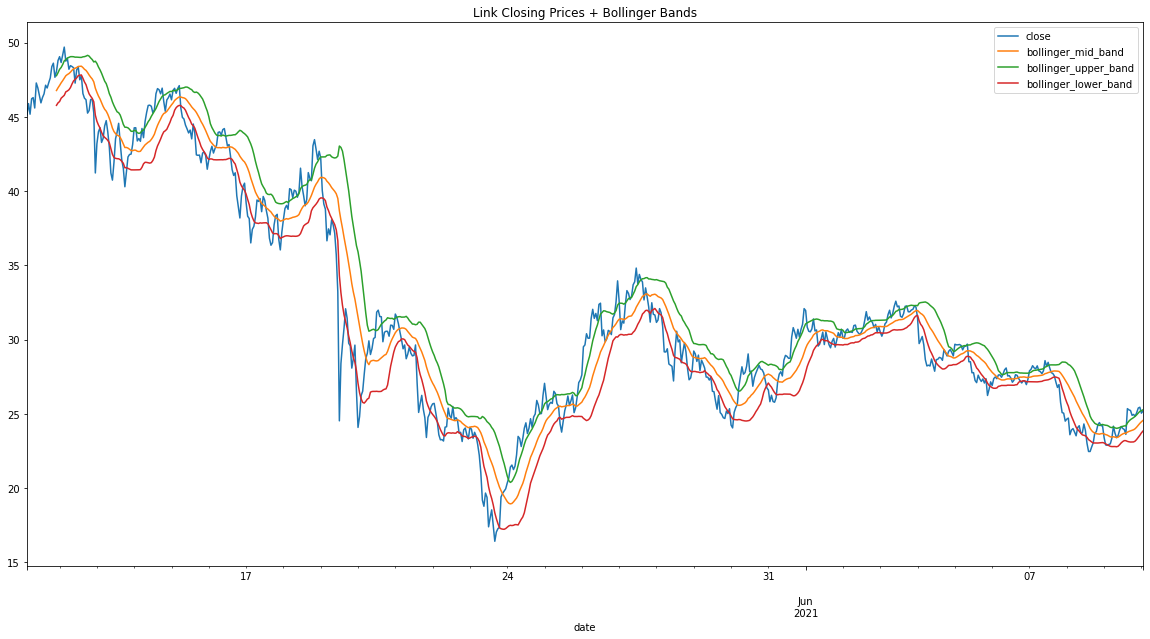

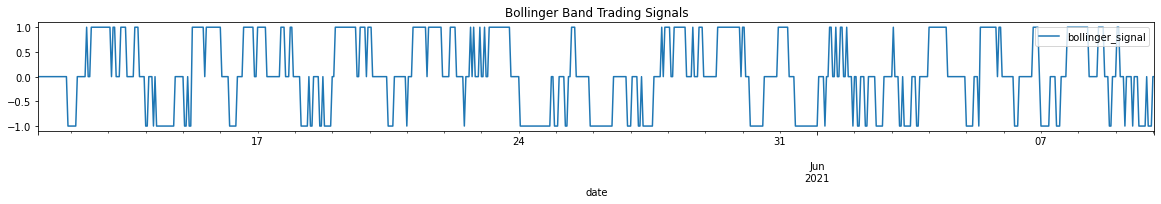

In [17]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
plt.title('Link Closing Prices + Bollinger Bands')
historical_prices_df[['bollinger_signal']].plot(figsize=(20,2))
plt.title('Bollinger Band Trading Signals')

### Build MACD Signals

In [18]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd

historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']

# Construct a conservative SELL signals
historical_prices_df['macd_diff_shift'] = historical_prices_df['macd_diff'].shift(1)
historical_prices_df['macd_diff_gradient'] = ( (historical_prices_df['macd_diff'] - historical_prices_df['macd_diff_shift']) / (historical_prices_df['macd_diff_shift']) )

historical_prices_df['macd_conservative_long_exit'] = np.where(historical_prices_df['macd_diff_gradient'] < 0, -1.0, 0.0)
historical_prices_df['macd_conservative_short_exit'] = np.where(historical_prices_df['macd_diff_gradient'] > 0, 1.0, 0.0)


mac_list = ['close', 'mac_fast_12', 'mac_slow_26', 'macd', 'mac_signal_line_9ema', 'macd_diff', 'macd_long', 'macd_short', 'macd_signal', 'macd_diff_shift', 'macd_diff_gradient', 'macd_conservative_long_exit', 'macd_conservative_short_exit']
historical_prices_df[mac_list].iloc[50:100]

close  mac_fast_12  mac_slow_26      macd  \
date                                                                
2021-05-13 05:00:00  44.38671    44.488095    45.510463 -1.022368   
2021-05-13 06:00:00  44.74971    44.528343    45.454111 -0.925767   
2021-05-13 07:00:00  43.99000    44.445521    45.345658 -0.900137   
2021-05-13 08:00:00  42.95477    44.216175    45.168555 -0.952380   
2021-05-13 09:00:00  41.22402    43.755843    44.876367 -1.120524   
2021-05-13 10:00:00  40.74371    43.292438    44.570245 -1.277806   
2021-05-13 11:00:00  41.95278    43.086337    44.376358 -1.290021   
2021-05-13 12:00:00  43.52829    43.154330    44.313539 -1.159209   
2021-05-13 13:00:00  43.96705    43.279364    44.287873 -1.008509   
2021-05-13 14:00:00  44.56894    43.477760    44.308692 -0.830932   
2021-05-13 15:00:00  43.25543    43.443555    44.230673 -0.787118   
2021-05-13 16:00:00  42.10000    43.236855    44.072845 -0.835991   
2021-05-13 17:00:00  41.53864    42.975591    43.885126 -0.909536   
2021-05-13 18:00:00  40.29654    42.563429    43.619305 -1.055876   
2021-05-13 19:00:00  41.32421    42.372780    43.449298 -1.076518   
2021-05-13 20:00:00  42.30095    42.361729    43.364235 -1.002506   
2021-05-13 21:00:00  42.47000    42.378386    43.297996 -0.919609   
2021-05-13 22:00:00  42.49652    42.396561    43.238627 -0.842066   
2021-05-13 23:00:00  43.14226    42.511284    43.231489 -0.720205   
2021-05-14 00:00:00  44.26324    42.780815    43.307915 -0.527099   
2021-05-14 01:00:00  44.27103    43.010079    43.379257 -0.369178   
2021-05-14 02:00:00  43.38080    43.067113    43.379371 -0.312258   
2021-05-14 03:00:00  43.54596    43.140782    43.391711 -0.250929   
2021-05-14 04:00:00  43.35558    43.173828    43.389035 -0.215207   
2021-05-14 05:00:00  44.22125    43.334970    43.450680 -0.115711   
2021-05-14 06:00:00  43.60051    43.375822    43.461779 -0.085957   
2021-05-14 07:00:00  44.69707    43.579091    43.553282  0.025809   
2021-05-14 08:00:00  45.30000    43.843846    43.682668  0.161178   
2021-05-14 09:00:00  45.77142    44.140396    43.837391  0.303005   
2021-05-14 10:00:00  45.79216    44.394514    43.982188  0.412325   
2021-05-14 11:00:00  45.71715    44.597996    44.110704  0.487292   
2021-05-14 12:00:00  45.27235    44.701743    44.196752  0.504991   
2021-05-14 13:00:00  45.49092    44.823155    44.292616  0.530539   
2021-05-14 14:00:00  46.56203    45.090674    44.460721  0.629953   
2021-05-14 15:00:00  46.90647    45.370027    44.641888  0.728140   
2021-05-14 16:00:00  46.82824    45.594368    44.803840  0.790528   
2021-05-14 17:00:00  46.55745    45.742534    44.933737  0.808798   
2021-05-14 18:00:00  46.93807    45.926463    45.082206  0.844257   
2021-05-14 19:00:00  46.05313    45.945950    45.154126  0.791824   
2021-05-14 20:00:00  45.37960    45.858819    45.170828  0.687991   
2021-05-14 21:00:00  46.14520    45.902878    45.243004  0.659874   
2021-05-14 22:00:00  46.30000    45.963974    45.321300  0.642674   
2021-05-14 23:00:00  46.54095    46.052739    45.411644  0.641095   
2021-05-15 00:00:00  46.15097    46.067852    45.466409  0.601443   
2021-05-15 01:00:00  46.78755    46.178574    45.564271  0.614303   
2021-05-15 02:00:00  46.92574    46.293523    45.665121  0.628402   
2021-05-15 03:00:00  46.58889    46.338964    45.733548  0.605416   
2021-05-15 04:00:00  46.91895    46.428193    45.821356  0.606837   
2021-05-15 05:00:00  47.10698    46.532621    45.916587  0.616034   
2021-05-15 06:00:00  45.60647    46.390137    45.893615  0.496521   

                     mac_signal_line_9ema  macd_diff  macd_long  macd_short  \
date                                                                          
2021-05-13 05:00:00             -0.869524  -0.152843        0.0        -1.0   
2021-05-13 06:00:00             -0.880773  -0.044994        0.0        -1.0   
2021-05-13 07:00:00             -0.884646  -0.015491        0.0        -1.0   
2021-05-13 08:00:00             -0.89819

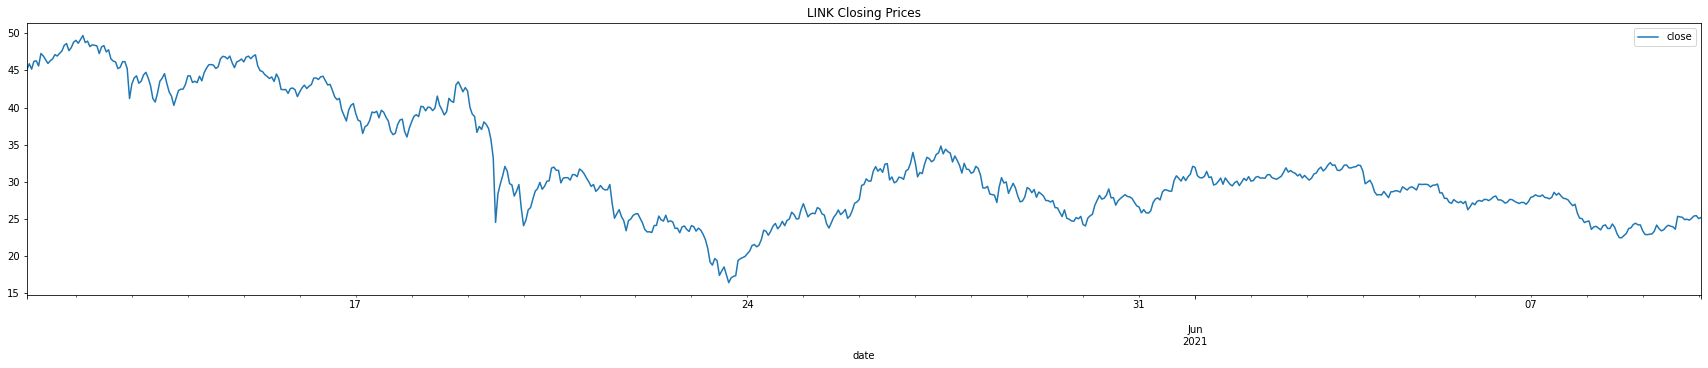

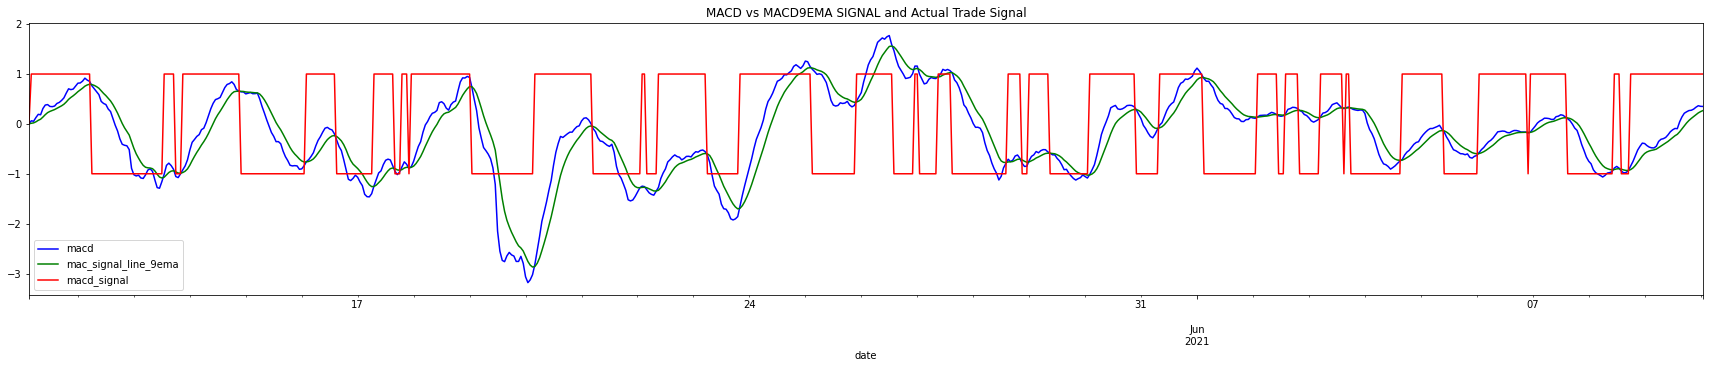

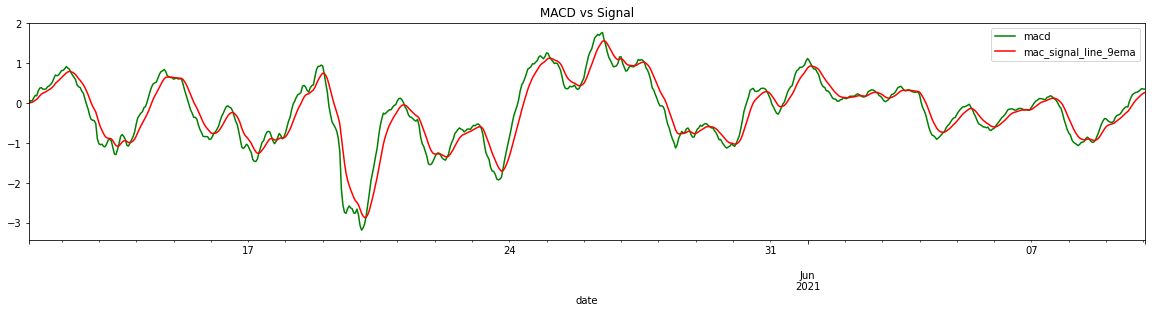

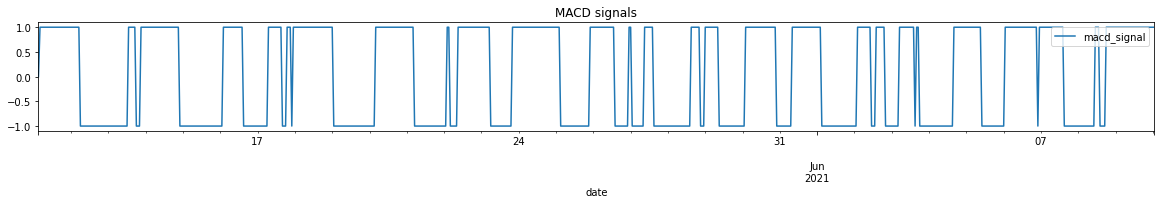

In [52]:
historical_prices_df[['close']].plot(figsize=(30,5))
plt.title('LINK Closing Prices');
historical_prices_df[['macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(30,5), color=['b', 'g', 'r'])
plt.title('MACD vs MACD9EMA SIGNAL and Actual Trade Signal');
historical_prices_df[['macd','mac_signal_line_9ema']].plot(figsize=(20,4), color=['g', 'r'])
plt.title('MACD vs Signal');
historical_prices_df[['macd_signal']].plot(figsize=(20,2))
plt.title('MACD signals');

<AxesSubplot:xlabel='date'>

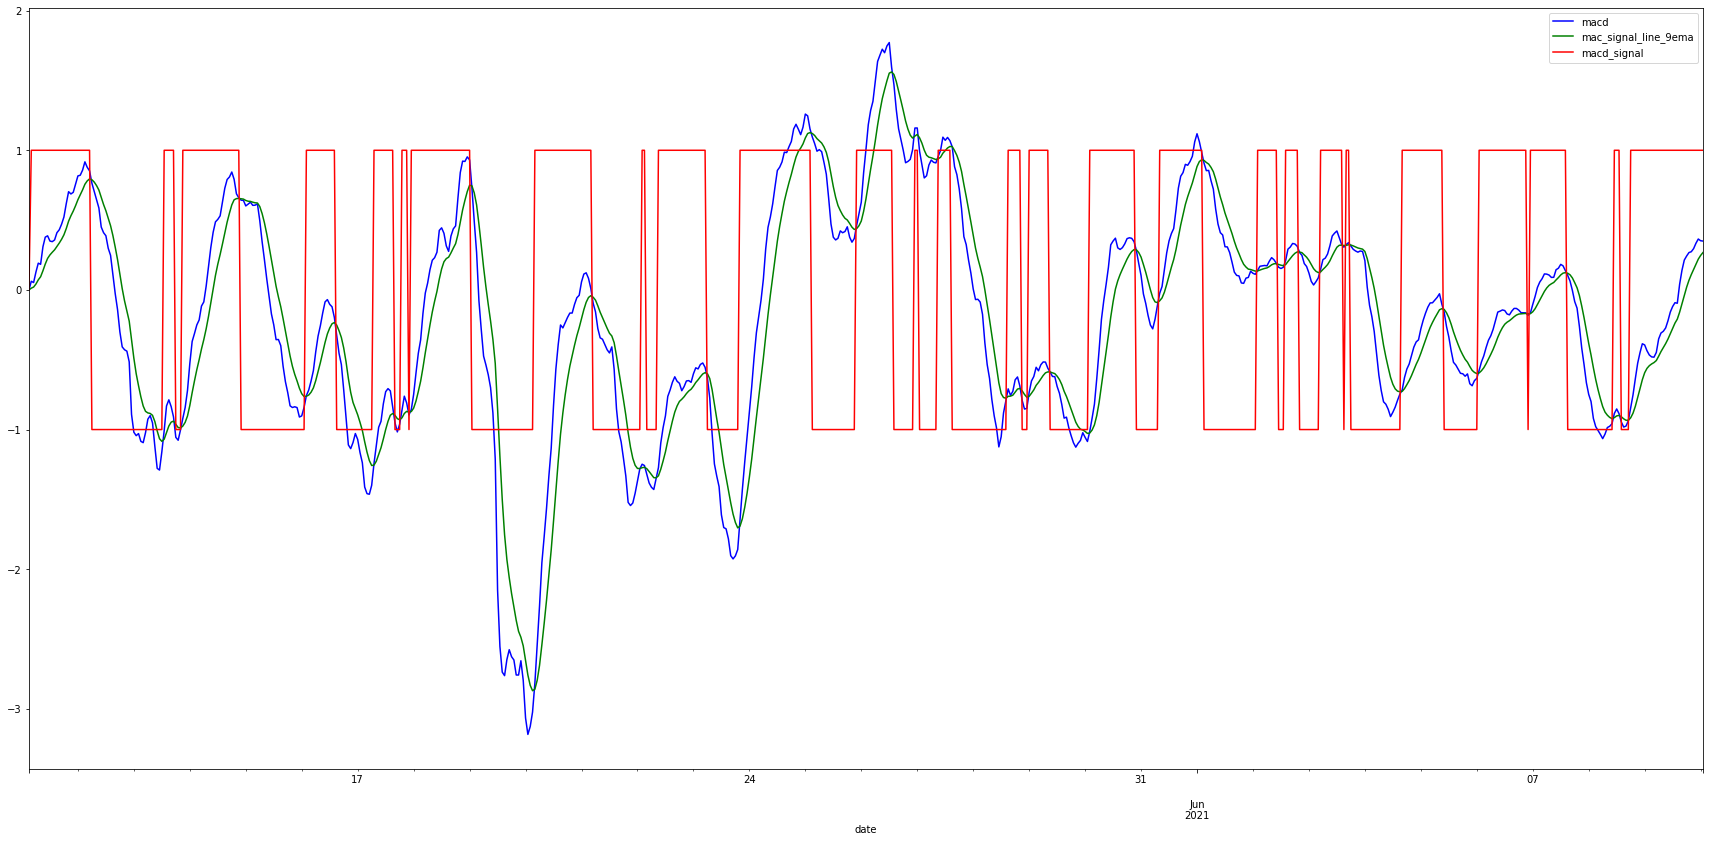

### Build RSI Signals

In [21]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 03:00:00  1620702000000  45.61936  46.18534  44.92075  45.12087   
2021-05-11 04:00:00  1620705600000  45.24759  45.97226  45.24759  45.89703   
2021-05-11 05:00:00  1620709200000  45.92392  46.16521  44.82914  45.18302   
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 03:00:00  1090.026507 2021-05-11 03:00:00     -0.011453  45.120870   
2021-05-11 04:00:00  1565.895482 2021-05-11 04:00:00      0.017202  45.523887   
2021-05-11 05:00:00   748.043652 2021-05-11 05:00:00     -0.015557  45.401410   
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  45.631360   
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  45.786167   

                        EMA_20  ...  macd_diff_gradient  \
date                            ...                       
2021-05-11 03:00:00  45.120870  ...                 NaN   
2021-05-11 04:00:00  45.515674  ...                 inf   
2021-05-11 05:00:00  45.400925  ...           -0.347847   
2021-05-11 06:00:00  45.617485  ...            1.663853   
2021-05-11 07:00:00  45.763361  ...            0.390199   

                     macd_conservative_long_exit  \
date                                               
2021-05-11 03:00:00                          0.0   
2021-05-11 04:00:00                          0.0   
2021-05-11 05:00:00                         -1.0   
2021-05-11 06:00:00                          0.0   
2021-05-11 07:00:00                          0.0   

                     macd_conservative_short_exit   change     gain     loss  \
date                                                                           
2021-05-11 03:00:00                           0.0      NaN      NaN      NaN   
2021-05-11 04:00:00                           1.0  0.77616  0.77616  0.00000   
2021-05-11 05:00:00                           0.0 -0.71401  0.00000  0.71401   
2021-05-11 06:00:00                           1.0  1.04088  1.04088  0.00000   
2021-05-11 07:00:00                           1.0  0.07494  0.07494  0.00000   

                     avg_gain  avg_loss  rs  rsi_14  
date                                                 
2021-05-11 03:00:00       NaN       NaN NaN     NaN  
2021-05-11 04:00:00       NaN       NaN NaN     NaN  
2021-05-11 05:00:00       NaN       NaN NaN     NaN  
2021-05-11 06:00:00       NaN       NaN NaN     NaN  
2021-05-11 07:00:00       NaN       NaN NaN     NaN  

[5 rows x 44 columns]

In [22]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold'] # NEED TO ADD 'rsi_signal',

historical_prices_df[rsi_list].iloc[50:100]
# historical_prices_df.head()

close  daily_return        rs     rsi_14  \
date                                                               
2021-05-13 05:00:00  44.38671      0.019092  0.804860  44.594055   
2021-05-13 06:00:00  44.74971      0.008178  0.868402  46.478335   
2021-05-13 07:00:00  43.99000     -0.016977  0.759615  43.169381   
2021-05-13 08:00:00  42.95477     -0.023533  0.641655  39.085871   
2021-05-13 09:00:00  41.22402     -0.040292  0.501454  33.397879   
2021-05-13 10:00:00  40.74371     -0.011651  0.470715  32.005874   
2021-05-13 11:00:00  41.95278      0.029675  0.636890  38.908541   
2021-05-13 12:00:00  43.52829      0.037554  0.870085  46.526498   
2021-05-13 13:00:00  43.96705      0.010080  0.940023  48.454209   
2021-05-13 14:00:00  44.56894      0.013690  1.043343  51.060583   
2021-05-13 15:00:00  43.25543     -0.029471  0.839496  45.637276   
2021-05-13 16:00:00  42.10000     -0.026712  0.708384  41.465157   
2021-05-13 17:00:00  41.53864     -0.013334  0.654871  39.572329   
2021-05-13 18:00:00  40.29654     -0.029902  0.554972  35.690147   
2021-05-13 19:00:00  41.32421      0.025503  0.690893  40.859663   
2021-05-13 20:00:00  42.30095      0.023636  0.830016  45.355675   
2021-05-13 21:00:00  42.47000      0.003996  0.855947  46.119157   
2021-05-13 22:00:00  42.49652      0.000624  0.860328  46.246041   
2021-05-13 23:00:00  43.14226      0.015195  0.975205  49.372334   
2021-05-14 00:00:00  44.26324      0.025983  1.189966  54.337190   
2021-05-14 01:00:00  44.27103      0.000176  1.191573  54.370678   
2021-05-14 02:00:00  43.38080     -0.020109  0.994800  49.869664   
2021-05-14 03:00:00  43.54596      0.003807  1.027794  50.685324   
2021-05-14 04:00:00  43.35558     -0.004372  0.987354  49.681847   
2021-05-14 05:00:00  44.22125      0.019967  1.180025  54.128972   
2021-05-14 06:00:00  43.60051     -0.014037  1.027194  50.670742   
2021-05-14 07:00:00  44.69707      0.025150  1.273587  56.016632   
2021-05-14 08:00:00  45.30000      0.013489  1.419484  58.668866   
2021-05-14 09:00:00  45.77142      0.010407  1.542333  60.666044   
2021-05-14 10:00:00  45.79216      0.000453  1.548153  60.755891   
2021-05-14 11:00:00  45.71715     -0.001638  1.513834  60.220133   
2021-05-14 12:00:00  45.27235     -0.009729  1.326108  57.009730   
2021-05-14 13:00:00  45.49092      0.004828  1.391731  58.189279   
2021-05-14 14:00:00  46.56203      0.023546  1.738058  63.477764   
2021-05-14 15:00:00  46.90647      0.007397  1.857994  65.010427   
2021-05-14 16:00:00  46.82824     -0.001668  1.805042  64.349913   
2021-05-14 17:00:00  46.55745     -0.005783  1.631694  62.001655   
2021-05-14 18:00:00  46.93807      0.008175  1.777064  63.990751   
2021-05-14 19:00:00  46.05313     -0.018853  1.302847  56.575495   
2021-05-14 20:00:00  45.37960     -0.014625  1.069023  51.668015   
2021-05-14 21:00:00  46.14520      0.016871  1.288721  56.307470   
2021-05-14 22:00:00  46.30000      0.003355  1.336559  57.202030   
2021-05-14 23:00:00  46.54095      0.005204  1.416749  58.622105   
2021-05-15 00:00:00  46.15097     -0.008379  1.243011  55.417078   
2021-05-15 01:00:00  46.78755      0.013793  1.458586  59.326209   
2021-05-15 02:00:00  46.92574      0.002954  1.508983  60.143210   
2021-05-15 03:00:00  46.58889     -0.007178  1.332674  57.130743   
2021-05-15 04:00:00  46.91895      0.007085  1.455965  59.282804   
2021-05-15 05:00:00  47.10698      0.004008  1.531604  60.499358   
2021-05-15 06:00:00  45.60647     -0.031853  0.928218  48.138634   

                     rsi_overbought  rsi_oversold  
date                                               
2021-05-13 05:00:00             0.0           0.0  
2021-05-13 06:00:00             0.0           0.0  
2021-05-13 07:00:00             0.0           0.0  
2021-05-13 08:00:00             0.0           0.0  
2021-05-13 09:00:00             0.0           0.0  
2021-05-13 10:00:00             0.0           0.0  
2021-05-13 11:00:00             0.0           0.0  
2021-05-13 12:00:00

In [23]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 15

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_periods', 'rsi_oversold_preceeding_periods'] # NEED TO ADD 'rsi_signal',


historical_prices_df['rsi_oversold_preceeding_periods'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_periods'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_periods'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_periods'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_periods',	'rsi_oversold_preceeding_periods',	'rsi_long',	'rsi_short',	'rsi_signal']
# display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[195:230])

rs     rsi_14  rsi_overbought  rsi_oversold  \
date                                                                     
2021-05-19 06:00:00  0.607166  37.778662             0.0           0.0   
2021-05-19 07:00:00  0.753022  42.955652             0.0           0.0   
2021-05-19 08:00:00  0.715398  41.704488             0.0           0.0   
2021-05-19 09:00:00  0.656952  39.648226             0.0           0.0   
2021-05-19 10:00:00  0.534525  34.833269             0.0           0.0   
2021-05-19 11:00:00  0.397473  28.442286             0.0           1.0   
2021-05-19 12:00:00  0.202964  16.871969             0.0           1.0   
2021-05-19 13:00:00  0.437065  30.413728             0.0           0.0   
2021-05-19 14:00:00  0.521288  34.266226             0.0           0.0   
2021-05-19 15:00:00  0.598509  37.441705             0.0           0.0   
2021-05-19 16:00:00  0.697524  41.090657             0.0           0.0   
2021-05-19 17:00:00  0.662875  39.863184             0.0           0.0   
2021-05-19 18:00:00  0.581263  36.759400             0.0           0.0   
2021-05-19 19:00:00  0.573191  36.434936             0.0           0.0   
2021-05-19 20:00:00  0.509269  33.742771             0.0           0.0   
2021-05-19 21:00:00  0.562380  35.995082             0.0           0.0   
2021-05-19 22:00:00  0.638953  38.985444             0.0           0.0   
2021-05-19 23:00:00  0.494764  33.099826             0.0           0.0   
2021-05-20 00:00:00  0.416873  29.422055             0.0           1.0   
2021-05-20 01:00:00  0.468565  31.906328             0.0           0.0   
2021-05-20 02:00:00  0.575542  36.529796             0.0           0.0   
2021-05-20 03:00:00  0.599368  37.475312             0.0           0.0   
2021-05-20 04:00:00  0.700945  41.209160             0.0           0.0   
2021-05-20 05:00:00  0.800583  44.462426             0.0           0.0   
2021-05-20 06:00:00  0.836727  45.555335             0.0           0.0   
2021-05-20 07:00:00  0.927709  48.124952             0.0           0.0   
2021-05-20 08:00:00  0.836632  45.552513             0.0           0.0   
2021-05-20 09:00:00  0.882491  46.878909             0.0           0.0   
2021-05-20 10:00:00  0.966255  49.141899             0.0           0.0   
2021-05-20 11:00:00  0.975979  49.392166             0.0           0.0   
2021-05-20 12:00:00  1.219736  54.949601             0.0           0.0   
2021-05-20 13:00:00  1.240772  55.372530             0.0           0.0   
2021-05-20 14:00:00  1.158025  53.661343             0.0           0.0   
2021-05-20 15:00:00  1.155268  53.602058             0.0           0.0   
2021-05-20 16:00:00  0.887114  47.009027             0.0           0.0   

                     rsi_overbought_preceeding_periods  \
date                                                     
2021-05-19 06:00:00                                0.0   
2021-05-19 07:00:00                                0.0   
2021-05-19 08:00:00                                0.0   
2021-05-19 09:00:00                                0.0   
2021-05-19 10:00:00                                0.0   
2021-05-19 11:00:00                                0.0   
2021-05-19 12:00:00                                0.0   
2021-05-19 13:00:00                                0.0   
2021-05-19 14:00:00                                0.0   
2021-05-19 15:00:00                                0.0   
2021-05-19 16:00:00                                0.0   
2021-05-19 17:00:00                                0.0   
2021-05-19 18:00:00                                0.0   
2021-05-19 19:00:00                                0.0   
2021-05-19 20:00:00                                0.0   
2021-05-19 21:00:00                                0.0   
2021-05-19 22:00:00                                0.0   
2021-05-19 23:00:00                                0.0   
2021-05-20 00:00:00                                0.0   
2021-05-20 01:00:00                                0.0   
2021-05-20 0

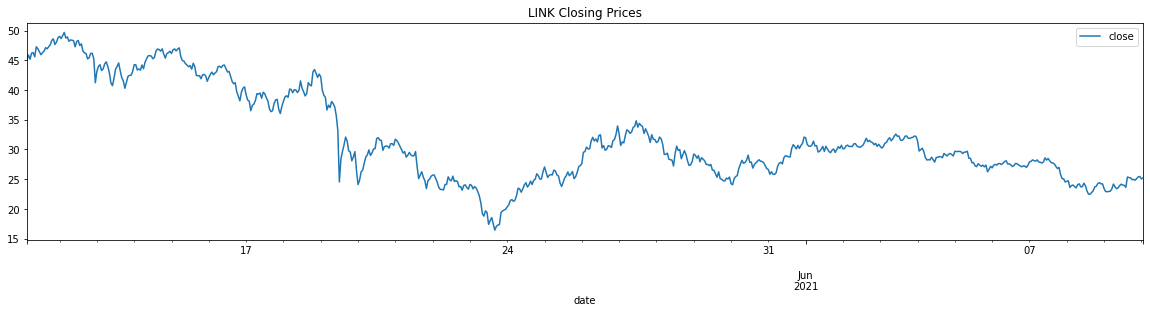

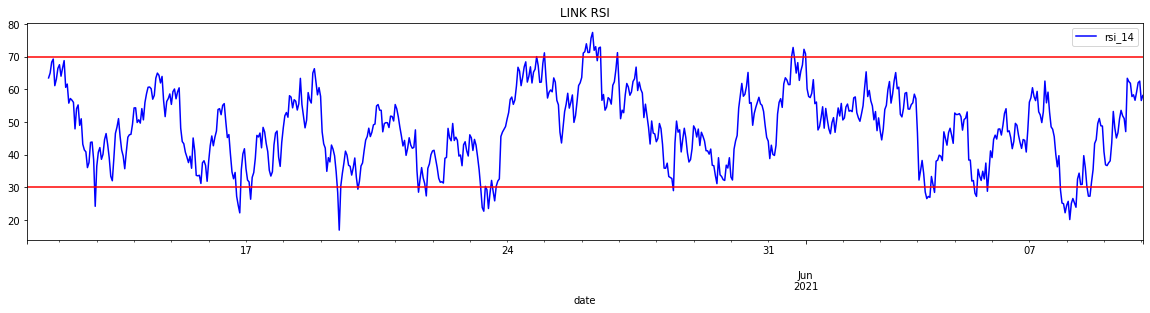

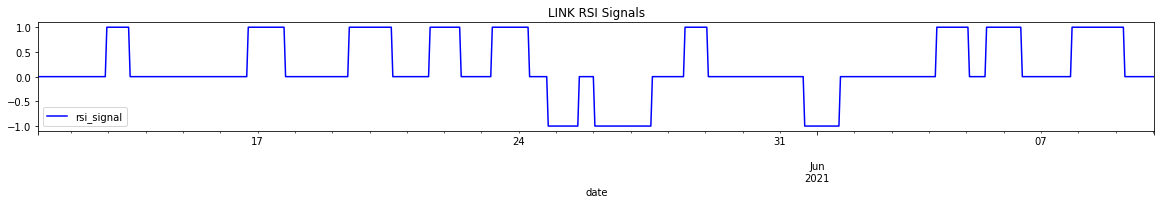

In [24]:
historical_prices_df[['close']].plot(figsize=(20,4))
plt.title('LINK Closing Prices');
historical_prices_df[['rsi_14']].plot(figsize=(20,4), color=['b', 'b'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')
plt.title('LINK RSI');
historical_prices_df[['rsi_signal']].plot(figsize=(20,2), color=['b'])
plt.title('LINK RSI Signals');

In [25]:
historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 03:00:00  1620702000000  45.61936  46.18534  44.92075  45.12087   
2021-05-11 04:00:00  1620705600000  45.24759  45.97226  45.24759  45.89703   
2021-05-11 05:00:00  1620709200000  45.92392  46.16521  44.82914  45.18302   
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   
2021-05-11 07:00:00  1620716400000  46.15898  46.29884  46.00106  46.29884   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 03:00:00  1090.026507 2021-05-11 03:00:00     -0.011453  45.120870   
2021-05-11 04:00:00  1565.895482 2021-05-11 04:00:00      0.017202  45.523887   
2021-05-11 05:00:00   748.043652 2021-05-11 05:00:00     -0.015557  45.401410   
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  45.631360   
2021-05-11 07:00:00  2002.386092 2021-05-11 07:00:00      0.001621  45.786167   

                        EMA_20  ...  avg_loss  rs  rsi_14  rsi_oversold  \
date                            ...                                       
2021-05-11 03:00:00  45.120870  ...       NaN NaN     NaN           0.0   
2021-05-11 04:00:00  45.515674  ...       NaN NaN     NaN           0.0   
2021-05-11 05:00:00  45.400925  ...       NaN NaN     NaN           0.0   
2021-05-11 06:00:00  45.617485  ...       NaN NaN     NaN           0.0   
2021-05-11 07:00:00  45.763361  ...       NaN NaN     NaN           0.0   

                     rsi_overbought  rsi_oversold_preceeding_periods  \
date                                                                   
2021-05-11 03:00:00             0.0                              0.0   
2021-05-11 04:00:00             0.0                              0.0   
2021-05-11 05:00:00             0.0                              0.0   
2021-05-11 06:00:00             0.0                              0.0   
2021-05-11 07:00:00             0.0                              0.0   

                     rsi_overbought_preceeding_periods  rsi_short  rsi_long  \
date                                                                          
2021-05-11 03:00:00                                0.0        0.0       0.0   
2021-05-11 04:00:00                                0.0        0.0       0.0   
2021-05-11 05:00:00                                0.0        0.0       0.0   
2021-05-11 06:00:00                                0.0        0.0       0.0   
2021-05-11 07:00:00                                0.0        0.0       0.0   

                     rsi_signal  
date                             
2021-05-11 03:00:00         0.0  
2021-05-11 04:00:00         0.0  
2021-05-11 05:00:00         0.0  
2021-05-11 06:00:00         0.0  
2021-05-11 07:00:00         0.0  

[5 rows x 51 columns]

# 2. MACHINE LEARNING COMPONENT

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [26]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [27]:
# Set x variable list of features
st1_x_var_list = ['close', 'crossover_signal_50v200', 'bollinger_signal', 'bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal']
st3_x_var_list = ['close', 'crossover_signal_50v200', 'macd_signal']
st4_x_var_list = ['close', 'crossover_signal_50v200', 'crossover_signal_9v20']

## Strategy 1 - EMA50V200 + Bollinger

In [28]:
historical_prices_df[st1_x_var_list]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-11 03:00:00  45.12087                      0.0               0.0   
2021-05-11 04:00:00  45.89703                      1.0               0.0   
2021-05-11 05:00:00  45.18302                      1.0               0.0   
2021-05-11 06:00:00  46.22390                      1.0               0.0   
2021-05-11 07:00:00  46.29884                      1.0               0.0   
...                       ...                      ...               ...   
2021-06-09 21:00:00  25.09464                     -1.0              -1.0   
2021-06-09 22:00:00  25.39884                     -1.0              -1.0   
2021-06-09 23:00:00  25.45000                     -1.0              -1.0   
2021-06-10 00:00:00  25.05017                     -1.0               0.0   
2021-06-10 01:00:00  25.19347                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-05-11 03:00:00                 NaN                   NaN   
2021-05-11 04:00:00                 NaN                   NaN   
2021-05-11 05:00:00                 NaN                   NaN   
2021-05-11 06:00:00                 NaN                   NaN   
2021-05-11 07:00:00                 NaN                   NaN   
...                                 ...                   ...   
2021-06-09 21:00:00           24.114922             24.942403   
2021-06-09 22:00:00           24.240654             25.062313   
2021-06-09 23:00:00           24.365997             25.170331   
2021-06-10 00:00:00           24.469282             25.217552   
2021-06-10 01:00:00           24.560863             25.277894   

                     bollinger_lower_band  
date                                       
2021-05-11 03:00:00                   NaN  
2021-05-11 04:00:00                   NaN  
2021-05-11 05:00:00                   NaN  
2021-05-11 06:00:00                   NaN  
2021-05-11 07:00:00                   NaN  
...                                   ...  
2021-06-09 21:00:00             23.287440  
2021-06-09 22:00:00             23.418994  
2021-06-09 23:00:00             23.561663  
2021-06-10 00:00:00             23.721011  
2021-06-10 01:00:00             23.843833  

[719 rows x 6 columns]

In [29]:
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]


# shift the bollinger signal down, to help find the OPTIMAL Buy/sell time 
strategy_1['bollinger_shift'] = strategy_1['bollinger_signal'].shift(1)


# Define long and short position conditions
strategy_1['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_1.iloc[509:528]
strategy_1.tail(20)

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-06-09 06:00:00  24.17353                     -1.0              -1.0   
2021-06-09 07:00:00  23.70598                     -1.0               0.0   
2021-06-09 08:00:00  23.40191                     -1.0               0.0   
2021-06-09 09:00:00  23.53781                     -1.0               0.0   
2021-06-09 10:00:00  23.90753                     -1.0               0.0   
2021-06-09 11:00:00  24.15363                     -1.0              -1.0   
2021-06-09 12:00:00  24.01709                     -1.0               0.0   
2021-06-09 13:00:00  23.94934                     -1.0               0.0   
2021-06-09 14:00:00  23.62249                     -1.0               0.0   
2021-06-09 15:00:00  25.35434                     -1.0              -1.0   
2021-06-09 16:00:00  25.27045                     -1.0              -1.0   
2021-06-09 17:00:00  25.22922                     -1.0              -1.0   
2021-06-09 18:00:00  24.90510                     -1.0              -1.0   
2021-06-09 19:00:00  24.96471                     -1.0              -1.0   
2021-06-09 20:00:00  24.83702                     -1.0               0.0   
2021-06-09 21:00:00  25.09464                     -1.0              -1.0   
2021-06-09 22:00:00  25.39884                     -1.0              -1.0   
2021-06-09 23:00:00  25.45000                     -1.0              -1.0   
2021-06-10 00:00:00  25.05017                     -1.0               0.0   
2021-06-10 01:00:00  25.19347                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-06-09 06:00:00           23.463011             24.120440   
2021-06-09 07:00:00           23.432127             24.060882   
2021-06-09 08:00:00           23.408669             24.028879   
2021-06-09 09:00:00           23.434488             24.048446   
2021-06-09 10:00:00           23.506380             24.084557   
2021-06-09 11:00:00           23.590598             24.131211   
2021-06-09 12:00:00           23.652834             24.165203   
2021-06-09 13:00:00           23.697785             24.193683   
2021-06-09 14:00:00           23.693579             24.189755   
2021-06-09 15:00:00           23.770850             24.390825   
2021-06-09 16:00:00           23.821039             24.518992   
2021-06-09 17:00:00           23.861629             24.617309   
2021-06-09 18:00:00           23.896476             24.684359   
2021-06-09 19:00:00           23.934680             24.755908   
2021-06-09 20:00:00           24.005891             24.841113   
2021-06-09 21:00:00           24.114922             24.942403   
2021-06-09 22:00:00           24.240654             25.062313   
2021-06-09 23:00:00           24.365997             25.170331   
2021-06-10 00:00:00           24.469282             25.217552   
2021-06-10 01:00:00           24.560863             25.277894   

                     bollinger_lower_band  bollinger_shift bull_or_bear  
date                                                                     
2021-06-09 06:00:00             22.805582              0.0         Bear  
2021-06-09 07:00:00             22.803373             -1.0         Bear  
2021-06-09 08:00:00             22.788459              0.0         Bear  
2021-06-09 09:00:00             22.820530              0.0         Bear  
2021-06-09 10:00:00             22.928204              0.0         Bear  
2021-06-09 11:00:00             23.049985              0.0         Bear  
2021-06-09 12:00:00             23.140465             -1.0         Bear  
2021-06-09 13:00:00             23.201888              0.0         Bear  
2021-06-09 14:00:00             23.197403              0.0         Bear  
2021-06-09 15:00:00             23.150874              0.0         Bear  
2021-06-09 16:00:00             

In [30]:
# IF BULL, BOLLINGER == 0, BOLLINGER_SHIFT == 1,

## Program the Conditional Logic for the Trading Strategy

In [31]:
# EMA50v200 - BOLL - BOLLSHIFT
# -1 - [  1] -  [1] - HOLD NO POSITION
# -1 - [  1] -  [0] - HOLD NO POSITION / CLOSE SHORT POSITION
# -1 - [  1] -  [-1] - CLOSE SHORT POSITION
# -1 - [  0] -  [1] - HOLD NO POSITION
# -1 - [  0] -  [0] - HOLD POSITION
# -1 - [  0] -  [-1] - HOLD SHORT POSITION
# -1 - [  -1] - [ 1] - CLOSE LONG, ENTER SHORT
# -1 - [  -1] - [ 0] - ENTERSHORT
# -1 - [  -1] - [ -1] - HOLDSHORT
# 1 - [  1] -  [1] - HOLD LONG
# 1 - [  1] -  [0] - ENTER LONG
# 1 - [  1] -  [-1] - CLOSE SHORT, ENTER LONG
# 1 - [  0] -  [1] - HOLD LONG (Do nothing)
# 1 - [  0] -  [0] - HOLD POSITION
# 1 - [  0] -  [-1] - HOLD POSITION
# 1 - [  -1] - [ 1] - CLOSE LONG
# 1 - [  -1] - [ 0] - HOLD POSITION / CLOSE LONG 
# 1 - [  -1] - [ -1] - HOLD NO POSITION

In [39]:
st1_position_code = 0
st1_positions = []

for index, row in strategy_1.iterrows():

# EMA:BOLL:BOLLSHIFT = -1 - [  1] -  [0] - NO POSITION / CLOSE SHORT POSITION
    if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] == 0):
        st1_position_code = 0
        st1_positions.append(st1_position_code)

# EMA:BOLL:BOLLSHIFT = 1 - [  -1] - [ 0] - NO POSITION / CLOSE LONG 
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == 0):
        st1_position_code = 0
        st1_positions.append(st1_position_code)

# EMA:BOLL:BOLLSHIFT = -1 - [  1] -  [-1] - CLOSE SHORT POSITION
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] == -1):
        st1_position_code = 0
        st1_positions.append(st1_position_code)

# NOT NEEDED DUE TO CODE BELOW
# # EMA:BOLL:BOLLSHIFT = -1 - [  -1] - [ 1] - CLOSE LONG, ENTER SHORT 
#     if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == 1):
#         st1_position_code = -1
#         st1_positions.append(st1_position_code)

# EMA:BOLL:BOLLSHIFT = -1 - [  -1] - [ 0] - ENTERSHORT
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] != -1):
        st1_position_code = -1
        st1_positions.append(st1_position_code)

# EMA:BOLL:BOLLSHIFT = 1 - [  1] -  [0] - ENTER LONG
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] != 1):
        st1_position_code = -1
        st1_positions.append(st1_position_code)

# NOT NEEDED DUE TO CODE ABOVE
# EMA:BOLL:BOLLSHIFT = 1 - [  1] -  [-1] - CLOSE SHORT, ENTER LONG
    # if (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] != -1):
    #     st1_position_code = -1
    #     st1_positions.append(st1_position_code)


# EMA:BOLL:BOLLSHIFT = 1 - [  -1] - [ 1] - CLOSE LONG

# else
    # EMA:BOLL:BOLLSHIFT = -1 - [  1] -  [1] - HOLD NO POSITION
    # EMA:BOLL:BOLLSHIFT = -1 - [  0] -  [1] - HOLD NO POSITION
    # EMA:BOLL:BOLLSHIFT = -1 - [  0] -  [0] - HOLD POSITION
    # EMA:BOLL:BOLLSHIFT = -1 - [  -1] - [ -1] - HOLDSHORT
    # EMA:BOLL:BOLLSHIFT = -1 - [  0] -  [-1] - HOLD SHORT POSITION
    # EMA:BOLL:BOLLSHIFT = 1 - [  1] -  [1] - HOLD LONG
    # EMA:BOLL:BOLLSHIFT = 1 - [  0] -  [1] - HOLD LONG (Do nothing)
    # EMA:BOLL:BOLLSHIFT = 1 - [  0] -  [0] - HOLD POSITION
    # EMA:BOLL:BOLLSHIFT = 1 - [  0] -  [-1] - HOLD POSITION
    # EMA:BOLL:BOLLSHIFT = 1 - [  -1] - [ -1] - HOLD NO POSITION
    else:
        st1_position_code = st1_position_code
        st1_positions.append(st1_position_code)

    


# Double check the dataframes have the same row lengths
display(len(st1_positions))
display(strategy_1.shape)
display(historical_prices_df.shape)

719

(719, 11)

(719, 53)

In [40]:
# st1_position_code = 0
# st1_positions = []

# for index, row in strategy_1.iterrows():


#     # BUY SIGNALS, ONLY ENTERING TRADE WHEN PRICE REENTERS FAIR TRADING ZONE
    
#     # IF BEAR + BOLL (WAS JUST) == -1, EXIT SHORT (BUY OUT)
#     if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
#         st1_position_code = -1
#         st1_positions.append(st1_position_code)
    
    
#     # ELIF BULL + BOLL == 1 BUY
#     elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
#         st1_position_code = 1
#         st1_positions.append(st1_position_code)  


#     # EXIT SIGNALS. LESS CONDITIONS. SELL THE SECOND TRADING CONDITIONS AREN'T FAVOURABLE


#     # ELIF BEAR + BOLL == 1, EXIT SHORT / NO POSITION
#     elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] != 1):
#         st1_position_code = 0
#         st1_positions.append(st1_position_code)
    
    
    
#     # ELIF BULL + BOLL == -1, EXIT LONG / NO POSITION
#     elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == -1):
#         st1_position_code = 0
#         st1_positions.append(st1_position_code) 

    
#     # ELSE : O / NA
#     else:
#         st1_position_code = st1_position_code
#         st1_positions.append(st1_position_code)
#         # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")

# # Double check the dataframes have the same row lengths
# display(len(st1_positions))
# display(strategy_1.shape)
# display(historical_prices_df.shape)

In [41]:
strategy_1['boll_ema50200_position'] = st1_positions
historical_prices_df['st1_boll_ema50200_position'] = st1_positions
# strategy_1[130:170]
strategy_1[695:830]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-06-09 02:00:00  22.88420                     -1.0               1.0   
2021-06-09 03:00:00  22.94313                     -1.0               0.0   
2021-06-09 04:00:00  22.98448                     -1.0               0.0   
2021-06-09 05:00:00  23.36183                     -1.0               0.0   
2021-06-09 06:00:00  24.17353                     -1.0              -1.0   
2021-06-09 07:00:00  23.70598                     -1.0               0.0   
2021-06-09 08:00:00  23.40191                     -1.0               0.0   
2021-06-09 09:00:00  23.53781                     -1.0               0.0   
2021-06-09 10:00:00  23.90753                     -1.0               0.0   
2021-06-09 11:00:00  24.15363                     -1.0              -1.0   
2021-06-09 12:00:00  24.01709                     -1.0               0.0   
2021-06-09 13:00:00  23.94934                     -1.0               0.0   
2021-06-09 14:00:00  23.62249                     -1.0               0.0   
2021-06-09 15:00:00  25.35434                     -1.0              -1.0   
2021-06-09 16:00:00  25.27045                     -1.0              -1.0   
2021-06-09 17:00:00  25.22922                     -1.0              -1.0   
2021-06-09 18:00:00  24.90510                     -1.0              -1.0   
2021-06-09 19:00:00  24.96471                     -1.0              -1.0   
2021-06-09 20:00:00  24.83702                     -1.0               0.0   
2021-06-09 21:00:00  25.09464                     -1.0              -1.0   
2021-06-09 22:00:00  25.39884                     -1.0              -1.0   
2021-06-09 23:00:00  25.45000                     -1.0              -1.0   
2021-06-10 00:00:00  25.05017                     -1.0               0.0   
2021-06-10 01:00:00  25.19347                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-06-09 02:00:00           23.575866             24.224912   
2021-06-09 03:00:00           23.518966             24.171259   
2021-06-09 04:00:00           23.457974             24.099757   
2021-06-09 05:00:00           23.440325             24.079522   
2021-06-09 06:00:00           23.463011             24.120440   
2021-06-09 07:00:00           23.432127             24.060882   
2021-06-09 08:00:00           23.408669             24.028879   
2021-06-09 09:00:00           23.434488             24.048446   
2021-06-09 10:00:00           23.506380             24.084557   
2021-06-09 11:00:00           23.590598             24.131211   
2021-06-09 12:00:00           23.652834             24.165203   
2021-06-09 13:00:00           23.697785             24.193683   
2021-06-09 14:00:00           23.693579             24.189755   
2021-06-09 15:00:00           23.770850             24.390825   
2021-06-09 16:00:00           23.821039             24.518992   
2021-06-09 17:00:00           23.861629             24.617309   
2021-06-09 18:00:00           23.896476             24.684359   
2021-06-09 19:00:00           23.934680             24.755908   
2021-06-09 20:00:00           24.005891             24.841113   
2021-06-09 21:00:00           24.114922             24.942403   
2021-06-09 22:00:00           24.240654             25.062313   
2021-06-09 23:00:00           24.365997             25.170331   
2021-06-10 00:00:00           24.469282             25.217552   
2021-06-10 01:00:00           24.560863             25.277894   

                     bollinger_lower_band  bollinger_shift bull_or_bear  \
date                                                                      
2021-06-09 02:00:00             22.926820              1.0         Bear   
2021-06-09 03:00:00             22.866672              1.0         Bear   
2021-06-09 04:00:00             22.816191              0

In [42]:
strategy_1['boll_ema50200_position_shift'] = strategy_1['boll_ema50200_position'].shift(1)
strategy_1[50:100]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-13 05:00:00  44.38671                     -1.0               0.0   
2021-05-13 06:00:00  44.74971                     -1.0               0.0   
2021-05-13 07:00:00  43.99000                     -1.0               0.0   
2021-05-13 08:00:00  42.95477                     -1.0               1.0   
2021-05-13 09:00:00  41.22402                     -1.0               1.0   
2021-05-13 10:00:00  40.74371                     -1.0               1.0   
2021-05-13 11:00:00  41.95278                     -1.0               1.0   
2021-05-13 12:00:00  43.52829                     -1.0               0.0   
2021-05-13 13:00:00  43.96705                     -1.0               0.0   
2021-05-13 14:00:00  44.56894                     -1.0               0.0   
2021-05-13 15:00:00  43.25543                     -1.0               0.0   
2021-05-13 16:00:00  42.10000                     -1.0               0.0   
2021-05-13 17:00:00  41.53864                     -1.0               1.0   
2021-05-13 18:00:00  40.29654                     -1.0               1.0   
2021-05-13 19:00:00  41.32421                     -1.0               1.0   
2021-05-13 20:00:00  42.30095                     -1.0               0.0   
2021-05-13 21:00:00  42.47000                     -1.0               0.0   
2021-05-13 22:00:00  42.49652                     -1.0               0.0   
2021-05-13 23:00:00  43.14226                     -1.0               0.0   
2021-05-14 00:00:00  44.26324                     -1.0              -1.0   
2021-05-14 01:00:00  44.27103                     -1.0              -1.0   
2021-05-14 02:00:00  43.38080                     -1.0               0.0   
2021-05-14 03:00:00  43.54596                     -1.0               0.0   
2021-05-14 04:00:00  43.35558                     -1.0               0.0   
2021-05-14 05:00:00  44.22125                     -1.0              -1.0   
2021-05-14 06:00:00  43.60051                     -1.0               0.0   
2021-05-14 07:00:00  44.69707                     -1.0              -1.0   
2021-05-14 08:00:00  45.30000                     -1.0              -1.0   
2021-05-14 09:00:00  45.77142                     -1.0              -1.0   
2021-05-14 10:00:00  45.79216                     -1.0              -1.0   
2021-05-14 11:00:00  45.71715                     -1.0              -1.0   
2021-05-14 12:00:00  45.27235                     -1.0              -1.0   
2021-05-14 13:00:00  45.49092                     -1.0              -1.0   
2021-05-14 14:00:00  46.56203                     -1.0              -1.0   
2021-05-14 15:00:00  46.90647                     -1.0              -1.0   
2021-05-14 16:00:00  46.82824                     -1.0              -1.0   
2021-05-14 17:00:00  46.55745                     -1.0              -1.0   
2021-05-14 18:00:00  46.93807                     -1.0              -1.0   
2021-05-14 19:00:00  46.05313                     -1.0               0.0   
2021-05-14 20:00:00  45.37960                     -1.0               0.0   
2021-05-14 21:00:00  46.14520                     -1.0               0.0   
2021-05-14 22:00:00  46.30000                     -1.0               0.0   
2021-05-14 23:00:00  46.54095                     -1.0               0.0   
2021-05-15 00:00:00  46.15097                     -1.0               0.0   
2021-05-15 01:00:00  46.78755                     -1.0              -1.0   
2021-05-15 02:00:00  46.92574                     -1.0              -1.0   
2021-05-15 03:00:00  46.58889                     -1.0               0.0   
2021-05-15 04:00:00  46.91895                     -1.0              -1.0   
2021-05-15 05:00:00  47.10698                     -1.0              -1.0   
2021-05-15 06:00:00  45.60647                     -1.0               1.0   

                     bollinger_mid_band  bollinger_upper_band  \
date  

In [43]:
st1_signal_text = 'No Position - hold'
st1_signals = []

for index, row in strategy_1.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short'
        st1_signals.append(st1_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Close Long'
        st1_signals.append(st1_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'No Position - hold'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Sell Short'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Hold Short Position'
        st1_signals.append(st1_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = '‘Close Long Position, Enter short Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Hold Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short Position, Enter Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Enter Long Position'
        st1_signals.append(st1_signal_text)


    # Else, Signal = none
    else:
        st1_signal_text = st1_signal_text
        st1_signals.append(st1_signal_text)


strategy_1['boll_ema50200_signals'] = st1_signals
historical_prices_df['st1_boll_ema50200_signals'] = st1_signals
strategy_1[300:350]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-23 15:00:00  17.49156                     -1.0               1.0   
2021-05-23 16:00:00  16.42264                     -1.0               1.0   
2021-05-23 17:00:00  17.04758                     -1.0               1.0   
2021-05-23 18:00:00  17.26876                     -1.0               1.0   
2021-05-23 19:00:00  17.36061                     -1.0               0.0   
2021-05-23 20:00:00  19.40401                     -1.0               0.0   
2021-05-23 21:00:00  19.65021                     -1.0               0.0   
2021-05-23 22:00:00  19.80762                     -1.0               0.0   
2021-05-23 23:00:00  19.95446                     -1.0               0.0   
2021-05-24 00:00:00  20.34191                     -1.0               0.0   
2021-05-24 01:00:00  20.68749                     -1.0              -1.0   
2021-05-24 02:00:00  21.41743                     -1.0              -1.0   
2021-05-24 03:00:00  21.55679                     -1.0              -1.0   
2021-05-24 04:00:00  21.25172                     -1.0              -1.0   
2021-05-24 05:00:00  21.48121                     -1.0              -1.0   
2021-05-24 06:00:00  22.23709                     -1.0              -1.0   
2021-05-24 07:00:00  23.48604                     -1.0              -1.0   
2021-05-24 08:00:00  23.34597                     -1.0              -1.0   
2021-05-24 09:00:00  22.80577                     -1.0              -1.0   
2021-05-24 10:00:00  23.34231                     -1.0              -1.0   
2021-05-24 11:00:00  24.03863                     -1.0              -1.0   
2021-05-24 12:00:00  24.40000                     -1.0              -1.0   
2021-05-24 13:00:00  23.67628                     -1.0              -1.0   
2021-05-24 14:00:00  24.04068                     -1.0              -1.0   
2021-05-24 15:00:00  24.67779                     -1.0              -1.0   
2021-05-24 16:00:00  24.09421                     -1.0              -1.0   
2021-05-24 17:00:00  24.79692                     -1.0              -1.0   
2021-05-24 18:00:00  24.99401                     -1.0              -1.0   
2021-05-24 19:00:00  25.90776                     -1.0              -1.0   
2021-05-24 20:00:00  25.60288                     -1.0              -1.0   
2021-05-24 21:00:00  25.01000                     -1.0               0.0   
2021-05-24 22:00:00  25.02528                     -1.0               0.0   
2021-05-24 23:00:00  26.23844                     -1.0              -1.0   
2021-05-25 00:00:00  27.05940                     -1.0              -1.0   
2021-05-25 01:00:00  26.15567                     -1.0              -1.0   
2021-05-25 02:00:00  25.28786                     -1.0               0.0   
2021-05-25 03:00:00  25.64140                     -1.0               0.0   
2021-05-25 04:00:00  25.77953                     -1.0               0.0   
2021-05-25 05:00:00  25.70773                     -1.0               0.0   
2021-05-25 06:00:00  26.52522                     -1.0              -1.0   
2021-05-25 07:00:00  26.37547                     -1.0              -1.0   
2021-05-25 08:00:00  25.69750                     -1.0               0.0   
2021-05-25 09:00:00  25.52500                     -1.0               0.0   
2021-05-25 10:00:00  24.33000                     -1.0               1.0   
2021-05-25 11:00:00  23.77526                     -1.0               1.0   
2021-05-25 12:00:00  24.47733                     -1.0               1.0   
2021-05-25 13:00:00  25.21701                     -1.0               0.0   
2021-05-25 14:00:00  25.61000                     -1.0               0.0   
2021-05-25 15:00:00  26.20796                     -1.0               0.0   
2021-05-25 16:00:00  25.58419                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date  

In [44]:
historical_prices_df.head(4)

timestamp      open      high       low     close  \
date                                                                         
2021-05-11 03:00:00  1620702000000  45.61936  46.18534  44.92075  45.12087   
2021-05-11 04:00:00  1620705600000  45.24759  45.97226  45.24759  45.89703   
2021-05-11 05:00:00  1620709200000  45.92392  46.16521  44.82914  45.18302   
2021-05-11 06:00:00  1620712800000  45.33245  46.30187  45.33245  46.22390   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-11 03:00:00  1090.026507 2021-05-11 03:00:00     -0.011453  45.120870   
2021-05-11 04:00:00  1565.895482 2021-05-11 04:00:00      0.017202  45.523887   
2021-05-11 05:00:00   748.043652 2021-05-11 05:00:00     -0.015557  45.401410   
2021-05-11 06:00:00   898.658697 2021-05-11 06:00:00      0.023037  45.631360   

                        EMA_20  ...  rsi_14  rsi_oversold  rsi_overbought  \
date                            ...                                         
2021-05-11 03:00:00  45.120870  ...     NaN           0.0             0.0   
2021-05-11 04:00:00  45.515674  ...     NaN           0.0             0.0   
2021-05-11 05:00:00  45.400925  ...     NaN           0.0             0.0   
2021-05-11 06:00:00  45.617485  ...     NaN           0.0             0.0   

                     rsi_oversold_preceeding_periods  \
date                                                   
2021-05-11 03:00:00                              0.0   
2021-05-11 04:00:00                              0.0   
2021-05-11 05:00:00                              0.0   
2021-05-11 06:00:00                              0.0   

                     rsi_overbought_preceeding_periods  rsi_short  rsi_long  \
date                                                                          
2021-05-11 03:00:00                                0.0        0.0       0.0   
2021-05-11 04:00:00                                0.0        0.0       0.0   
2021-05-11 05:00:00                                0.0        0.0       0.0   
2021-05-11 06:00:00                                0.0        0.0       0.0   

                     rsi_signal  st1_boll_ema50200_position  \
date                                                          
2021-05-11 03:00:00         0.0                           0   
2021-05-11 04:00:00         0.0                           0   
2021-05-11 05:00:00         0.0                           0   
2021-05-11 06:00:00         0.0                           0   

                     st1_boll_ema50200_signals  
date                                            
2021-05-11 03:00:00         No Position - hold  
2021-05-11 04:00:00         No Position - hold  
2021-05-11 05:00:00         No Position - hold  
2021-05-11 06:00:00         No Position - hold  

[4 rows x 53 columns]

### Backtest Strategy 1

In [45]:
##TBA

### Graph Strategy 1

In [46]:
strategy_1['st1_boll_ema50200_long_closes'] = np.where(strategy_1['boll_ema50200_position'] == 1, strategy_1['close'], np.nan)
strategy_1['st1_boll_ema50200_no_posn_closes'] = np.where(strategy_1['boll_ema50200_position'] == 0, strategy_1['close'], np.nan)
strategy_1['st1_boll_ema50200_short_closes'] = np.where(strategy_1['boll_ema50200_position'] == -1, strategy_1['close'], np.nan)
# strategy_1[0:50]
strategy_1.head()

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-11 03:00:00  45.12087                      0.0               0.0   
2021-05-11 04:00:00  45.89703                      1.0               0.0   
2021-05-11 05:00:00  45.18302                      1.0               0.0   
2021-05-11 06:00:00  46.22390                      1.0               0.0   
2021-05-11 07:00:00  46.29884                      1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-05-11 03:00:00                 NaN                   NaN   
2021-05-11 04:00:00                 NaN                   NaN   
2021-05-11 05:00:00                 NaN                   NaN   
2021-05-11 06:00:00                 NaN                   NaN   
2021-05-11 07:00:00                 NaN                   NaN   

                     bollinger_lower_band  bollinger_shift bull_or_bear  \
date                                                                      
2021-05-11 03:00:00                   NaN              NaN         Bull   
2021-05-11 04:00:00                   NaN              0.0         Bull   
2021-05-11 05:00:00                   NaN              0.0         Bull   
2021-05-11 06:00:00                   NaN              0.0         Bull   
2021-05-11 07:00:00                   NaN              0.0         Bull   

                     boll_ema50200_position  boll_ema50200_position_shift  \
date                                                                        
2021-05-11 03:00:00                       0                           NaN   
2021-05-11 04:00:00                       0                           0.0   
2021-05-11 05:00:00                       0                           0.0   
2021-05-11 06:00:00                       0                           0.0   
2021-05-11 07:00:00                       0                           0.0   

                    boll_ema50200_signals  st1_boll_ema50200_long_closes  \
date                                                                       
2021-05-11 03:00:00    No Position - hold                            NaN   
2021-05-11 04:00:00    No Position - hold                            NaN   
2021-05-11 05:00:00    No Position - hold                            NaN   
2021-05-11 06:00:00    No Position - hold                            NaN   
2021-05-11 07:00:00    No Position - hold                            NaN   

                     st1_boll_ema50200_no_posn_closes  \
date                                                    
2021-05-11 03:00:00                          45.12087   
2021-05-11 04:00:00                          45.89703   
2021-05-11 05:00:00                          45.18302   
2021-05-11 06:00:00                          46.22390   
2021-05-11 07:00:00                          46.29884   

                     st1_boll_ema50200_short_closes  
date                                                 
2021-05-11 03:00:00                             NaN  
2021-05-11 04:00:00                             NaN  
2021-05-11 05:00:00                             NaN  
2021-05-11 06:00:00                             NaN  
2021-05-11 07:00:00                             NaN

In [47]:
# ______ BUILD MAIN GRAPH __________________ ##

# Visualize close price for the investment
price_closes = historical_prices_df[['close']].hvplot(
    line_color='gray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_1['st1_boll_ema50200_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_1['st1_boll_ema50200_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_1['st1_boll_ema50200_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______ BUILD BB COMPONENTS __________________ ##


bb_upper = strategy_1['bollinger_upper_band'].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_mid = strategy_1['bollinger_mid_band'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = strategy_1['bollinger_lower_band'].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_signal = strategy_1['bollinger_signal'].hvplot(
    line_color='black',
    ylabel='Price in $',
    width=1000,
    height=400
)


# ______ BUILD EMA50V200 COMPONENTS __________________ ##

ema50v200 = strategy_1['crossover_signal_50v200'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______ CALL PLOTS __________________ ##

# Overlay plots
# entry_st1_exit_plot = price_closes * st1_entry * st1_no_posn * st1_exit
entry_st1_exit_plot = price_closes * long_closes * noposn_closes * short_closes
bb_plot = price_closes * bb_upper * bb_mid * bb_lower 

display(entry_st1_exit_plot.opts(xaxis=None))
# display(bb_plot.opts(xaxis=None))
display(bb_signal.opts(xaxis=None))
display(ema50v200.opts(xaxis=None))


# historical_prices_df.hvplot(x='date', y='close', kind='line')

:Overlay
   .Curve.I                                :Curve   [date]   (close)
   .Curve.St1_boll_ema50200_long_closes    :Curve   [date]   (st1_boll_ema50200_long_closes)
   .Curve.St1_boll_ema50200_no_posn_closes :Curve   [date]   (st1_boll_ema50200_no_posn_closes)
   .Curve.St1_boll_ema50200_short_closes   :Curve   [date]   (st1_boll_ema50200_short_closes)

:Curve   [date]   (bollinger_signal)

:Curve   [date]   (crossover_signal_50v200)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'EMA50V200 Crossover Signal')

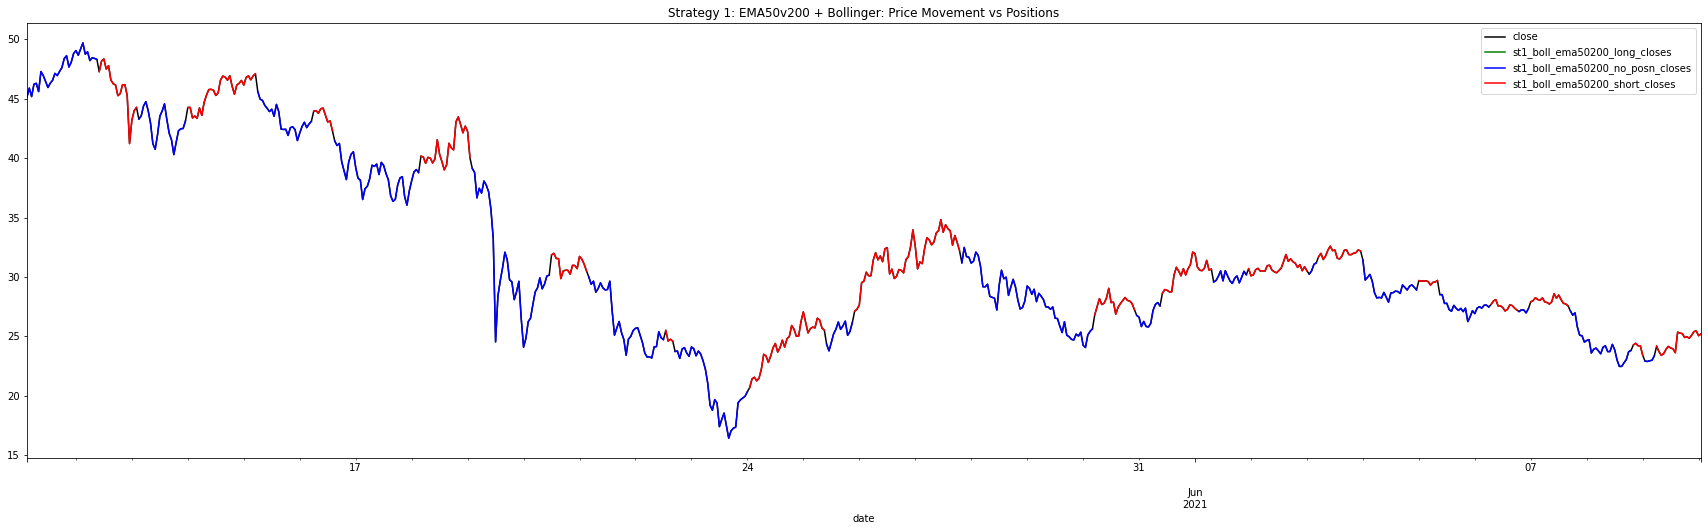

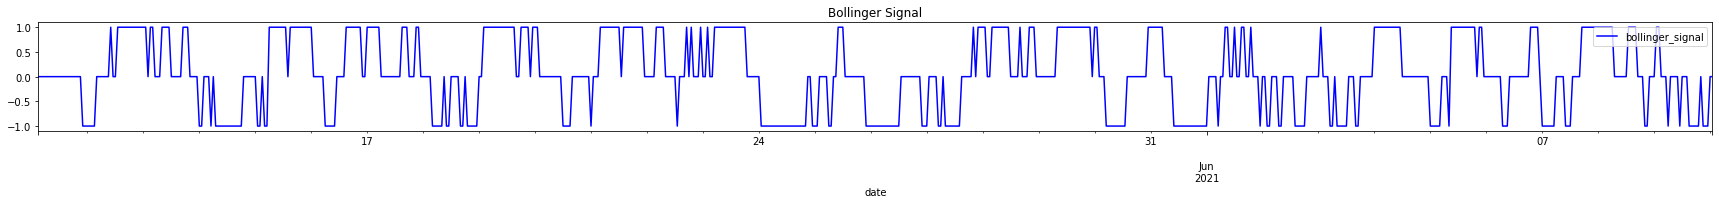

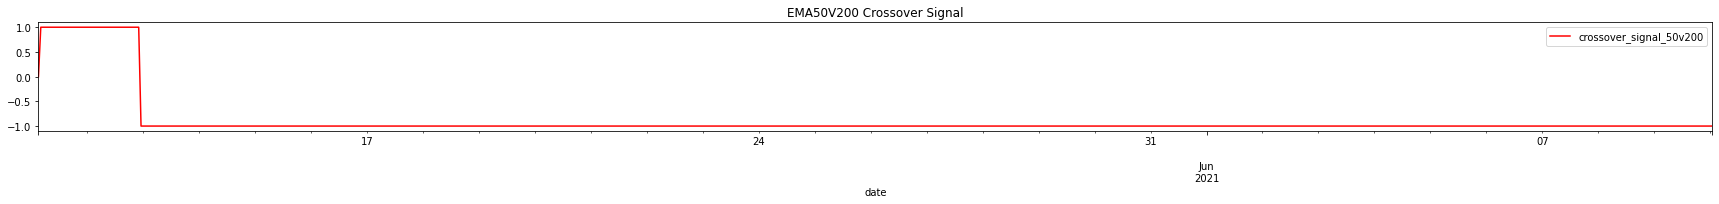

In [50]:
# PLOT IN MATPLOTLIB

display(strategy_1[['close', 'st1_boll_ema50200_long_closes', 'st1_boll_ema50200_no_posn_closes', 'st1_boll_ema50200_short_closes']].plot(figsize=(30,8), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 1: EMA50v200 + Bollinger: Price Movement vs Positions')
display(strategy_1[['bollinger_signal']].plot(figsize=(30,2), color=['b']))
plt.title('Bollinger Signal')
display(strategy_1[['crossover_signal_50v200']].plot(figsize=(30,2), color=['r']))
plt.title('EMA50V200 Crossover Signal')

## Strategy 2 - RSI + MACD

In [39]:
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal', 'macd_conservative_long_exit', 'macd_conservative_short_exit']

historical_prices_df[st2_x_var_list].head(20)

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   
2021-05-10 08:00:00  51.52213         0.0         -1.0   
2021-05-10 09:00:00  50.85370         0.0         -1.0   
2021-05-10 10:00:00  50.19934         0.0         -1.0   
2021-05-10 11:00:00  50.45710         0.0         -1.0   
2021-05-10 12:00:00  50.42942         0.0         -1.0   
2021-05-10 13:00:00  49.89203         0.0         -1.0   
2021-05-10 14:00:00  49.44167         0.0         -1.0   
2021-05-10 15:00:00  50.63303         0.0         -1.0   
2021-05-10 16:00:00  49.79332         0.0         -1.0   
2021-05-10 17:00:00  48.95640         1.0         -1.0   
2021-05-10 18:00:00  48.27648         1.0         -1.0   
2021-05-10 19:00:00  46.05948         1.0         -1.0   
2021-05-10 20:00:00  46.32462         1.0         -1.0   
2021-05-10 21:00:00  47.97513         1.0         -1.0   
2021-05-10 22:00:00  47.64895         1.0         -1.0   

                     macd_conservative_long_exit  macd_conservative_short_exit  
date                                                                            
2021-05-10 03:00:00                          0.0                           0.0  
2021-05-10 04:00:00                         -1.0                           0.0  
2021-05-10 05:00:00                          0.0                           1.0  
2021-05-10 06:00:00                         -1.0                           0.0  
2021-05-10 07:00:00                          0.0                           1.0  
2021-05-10 08:00:00                          0.0                           1.0  
2021-05-10 09:00:00                          0.0                           1.0  
2021-05-10 10:00:00                          0.0                           1.0  
2021-05-10 11:00:00                          0.0                           1.0  
2021-05-10 12:00:00                          0.0                           1.0  
2021-05-10 13:00:00                          0.0                           1.0  
2021-05-10 14:00:00                          0.0                           1.0  
2021-05-10 15:00:00                         -1.0                           0.0  
2021-05-10 16:00:00                         -1.0                           0.0  
2021-05-10 17:00:00                          0.0                           1.0  
2021-05-10 18:00:00                          0.0                           1.0  
2021-05-10 19:00:00                          0.0                           1.0  
2021-05-10 20:00:00                          0.0                           1.0  
2021-05-10 21:00:00                         -1.0                           0.0  
2021-05-10 22:00:00                         -1.0                           0.0

In [40]:
# Filter by x-variable list
strategy_2 = historical_prices_df[st2_x_var_list]

# Define long and short position conditions

environment = 'none'
environments = []

for index, row in strategy_2.iterrows():

    # If RSI signal == 1, OVERSOLD. I.e. enter long position
    if (row['rsi_signal'] == 1):
        environment = "Oversold. LONG!"
        environments.append(environment)
    
    # If RSI signal == -1, OVERBOUGHT. I.e. enter short position
    elif (row['rsi_signal'] == -1):
        environment = "Overbought. SELL!"
        environments.append(environment)
    
    # Else, price is fair
    else:
        environment = "Fair price"
        environments.append(environment)

display(len(environments))
display(strategy_2.shape)
display(historical_prices_df.shape)


719

(719, 5)

(719, 53)

In [41]:
strategy_2['rsi_window'] = environments
# historical_prices_df['rsi_window'] = environments
# strategy_2[130:170]
strategy_2[50:100]

close  rsi_signal  macd_signal  \
date                                                     
2021-05-12 05:00:00  48.94800         0.0          1.0   
2021-05-12 06:00:00  48.21088         0.0          1.0   
2021-05-12 07:00:00  48.45093         0.0          1.0   
2021-05-12 08:00:00  48.39182         0.0          1.0   
2021-05-12 09:00:00  48.30960         0.0          1.0   
2021-05-12 10:00:00  47.27648         0.0         -1.0   
2021-05-12 11:00:00  48.17051         0.0         -1.0   
2021-05-12 12:00:00  48.35014         0.0         -1.0   
2021-05-12 13:00:00  47.50000         0.0         -1.0   
2021-05-12 14:00:00  47.78614         0.0         -1.0   
2021-05-12 15:00:00  46.57310         0.0         -1.0   
2021-05-12 16:00:00  46.26211         0.0         -1.0   
2021-05-12 17:00:00  46.15639         0.0         -1.0   
2021-05-12 18:00:00  45.25612         0.0         -1.0   
2021-05-12 19:00:00  45.43140         0.0         -1.0   
2021-05-12 20:00:00  46.17338         0.0         -1.0   
2021-05-12 21:00:00  46.18717         0.0         -1.0   
2021-05-12 22:00:00  45.26291         0.0         -1.0   
2021-05-12 23:00:00  41.22566         1.0         -1.0   
2021-05-13 00:00:00  43.18796         1.0         -1.0   
2021-05-13 01:00:00  43.99578         1.0         -1.0   
2021-05-13 02:00:00  44.27236         1.0         -1.0   
2021-05-13 03:00:00  43.28022         1.0         -1.0   
2021-05-13 04:00:00  43.55515         1.0         -1.0   
2021-05-13 05:00:00  44.38671         1.0         -1.0   
2021-05-13 06:00:00  44.74971         1.0         -1.0   
2021-05-13 07:00:00  43.99000         1.0          1.0   
2021-05-13 08:00:00  42.95477         1.0         -1.0   
2021-05-13 09:00:00  41.22402         1.0         -1.0   
2021-05-13 10:00:00  40.74371         1.0         -1.0   
2021-05-13 11:00:00  41.95278         1.0         -1.0   
2021-05-13 12:00:00  43.52829         1.0         -1.0   
2021-05-13 13:00:00  43.96705         1.0          1.0   
2021-05-13 14:00:00  44.56894         0.0          1.0   
2021-05-13 15:00:00  43.25543         0.0          1.0   
2021-05-13 16:00:00  42.10000         0.0          1.0   
2021-05-13 17:00:00  41.53864         0.0          1.0   
2021-05-13 18:00:00  40.29654         0.0         -1.0   
2021-05-13 19:00:00  41.32421         0.0         -1.0   
2021-05-13 20:00:00  42.30095         0.0         -1.0   
2021-05-13 21:00:00  42.47000         0.0          1.0   
2021-05-13 22:00:00  42.49652         0.0          1.0   
2021-05-13 23:00:00  43.14226         0.0          1.0   
2021-05-14 00:00:00  44.26324         0.0          1.0   
2021-05-14 01:00:00  44.27103         0.0          1.0   
2021-05-14 02:00:00  43.38080         0.0          1.0   
2021-05-14 03:00:00  43.54596         0.0          1.0   
2021-05-14 04:00:00  43.35558         0.0          1.0   
2021-05-14 05:00:00  44.22125         0.0          1.0   
2021-05-14 06:00:00  43.60051         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-12 05:00:00                         -1.0   
2021-05-12 06:00:00                         -1.0   
2021-05-12 07:00:00                         -1.0   
2021-05-12 08:00:00                         -1.0   
2021-05-12 09:00:00                         -1.0   
2021-05-12 10:00:00                         -1.0   
2021-05-12 11:00:00                         -1.0   
2021-05-12 12:00:00                         -1.0   
2021-05-12 13:00:00                          0.0   
2021-05-12 14:00:00                          0.0   
2021-05-12 15:00:00                          0.0   
2021-05-12 16:00:00                          0.0   
2021-05-12 17:00:00                          0.0   
2021-05-12 18:00:00                          0.0   
2021-05-12 19:00:00                          0.0   
2021-05-12 20:00:00                         -1.0   
2021-05-12 21:00:00                         -1.0   
2021-05-12 22:00:00

In [42]:
# CREATE A MACD SIGNAL SHIFT 
strategy_2['macd_signal_shift'] = strategy_2['macd_signal'].shift(1)
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-10 03:00:00                           0.0  Fair price   
2021-05-10 04:00:00                           0.0  Fair price   
2021-05-10 05:00:00                           1.0  Fair price   
2021-05-10 06:00:00                           0.0  Fair price   
2021-05-10 07:00:00                           1.0  Fair price   

                     macd_signal_shift  
date                                    
2021-05-10 03:00:00                NaN  
2021-05-10 04:00:00                0.0  
2021-05-10 05:00:00               -1.0  
2021-05-10 06:00:00               -1.0  
2021-05-10 07:00:00               -1.0

### Program the Conditional Logic for the Trading Strategy

### Aggresive Macd. i.e hold until the next macd cross

In [43]:
st2_position_code = 0
st2_positions = []

for index, row in strategy_2.iterrows():


    ## RSI OVERSOLD SCENARIOS


    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL (1), BUY
    if (row['rsi_signal'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 1
        st2_positions.append(st2_position_code)

    
    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    


    ## RSI OVERBOUGHT SCENARIOS


    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = -1
        st2_positions.append(st2_position_code)
    
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL (1), BUY
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)



    ## RSI FAIR SCENARIOS


    # # IF RSI == FAIR (0) AND MACD GOES FROM 1 to -1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    
    # # IF RSI == FAIR (0) AND MACD GOES FROM -1 to 1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)


    ## OTHER



    # ELSE : 0 / NA
    else:
        st2_position_code = st2_position_code
        st2_positions.append(st2_position_code)


display(len(st2_positions))
display(strategy_2.shape)
display(historical_prices_df.shape)

719

(719, 7)

(719, 53)

In [44]:
strategy_2['rsi_macd_agg_position'] = st2_positions
historical_prices_df['st2_rsi_macd_agg_position'] = st2_positions
# strategy_2[130:170]
# strategy_2[400:450]
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-10 03:00:00                           0.0  Fair price   
2021-05-10 04:00:00                           0.0  Fair price   
2021-05-10 05:00:00                           1.0  Fair price   
2021-05-10 06:00:00                           0.0  Fair price   
2021-05-10 07:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  
date                                                           
2021-05-10 03:00:00                NaN                      0  
2021-05-10 04:00:00                0.0                      0  
2021-05-10 05:00:00               -1.0                      0  
2021-05-10 06:00:00               -1.0                      0  
2021-05-10 07:00:00               -1.0                      0

In [45]:
strategy_2['rsi_macd_agg_position_shift'] = strategy_2['rsi_macd_agg_position'].shift(1)
# strategy_2[50:100]
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-10 03:00:00                           0.0  Fair price   
2021-05-10 04:00:00                           0.0  Fair price   
2021-05-10 05:00:00                           1.0  Fair price   
2021-05-10 06:00:00                           0.0  Fair price   
2021-05-10 07:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  \
date                                                            
2021-05-10 03:00:00                NaN                      0   
2021-05-10 04:00:00                0.0                      0   
2021-05-10 05:00:00               -1.0                      0   
2021-05-10 06:00:00               -1.0                      0   
2021-05-10 07:00:00               -1.0                      0   

                     rsi_macd_agg_position_shift  
date                                              
2021-05-10 03:00:00                          NaN  
2021-05-10 04:00:00                          0.0  
2021-05-10 05:00:00                          0.0  
2021-05-10 06:00:00                          0.0  
2021-05-10 07:00:00                          0.0

In [46]:
st2_signal = 'NA'
st2_signal_text = 'No Position - hold'
st2_signals = []

for index, row in strategy_2.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short'
        st2_signals.append(st2_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Close Long'
        st2_signals.append(st2_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'No Position - hold'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Sell Short'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Hold Short Position'
        st2_signals.append(st2_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = '‘Close Long Position, Enter short Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Hold Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short Position, Enter Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Enter Long Position'
        st2_signals.append(st2_signal_text)


    # Else, Signal = none
    else:
        st2_signal_text = st2_signal_text
        st2_signals.append(st2_signal_text)


strategy_2['rsi_macd_agg_signals'] = st2_signals
historical_prices_df['st2_rsi_macd_agg_signals'] = st2_signals
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-10 03:00:00                           0.0  Fair price   
2021-05-10 04:00:00                           0.0  Fair price   
2021-05-10 05:00:00                           1.0  Fair price   
2021-05-10 06:00:00                           0.0  Fair price   
2021-05-10 07:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  \
date                                                            
2021-05-10 03:00:00                NaN                      0   
2021-05-10 04:00:00                0.0                      0   
2021-05-10 05:00:00               -1.0                      0   
2021-05-10 06:00:00               -1.0                      0   
2021-05-10 07:00:00               -1.0                      0   

                     rsi_macd_agg_position_shift rsi_macd_agg_signals  
date                                                                   
2021-05-10 03:00:00                          NaN   No Position - hold  
2021-05-10 04:00:00                          0.0   No Position - hold  
2021-05-10 05:00:00                          0.0   No Position - hold  
2021-05-10 06:00:00                          0.0   No Position - hold  
2021-05-10 07:00:00                          0.0   No Position - hold

In [47]:
# st2_long_position_closes = []
# st2_no_position_closes = []
# st2_short_position_closes = []

# st2_long_position_close = np.nan
# st2_no_position_close = np.nan
# st2_short_position_close = np.nan

# for index, row in strategy_2.iterrows():

#     # LONG / Position == 1, close = green
#     if (row['rsi_macd_agg_position'] == 1):
#         st2_long_position_closes = row['close']
#         # st2_long_position_closes.append(st2_long_position_close)

#     # LONG / Position != 1 & Position_shift == 1, close = green
#     elif (row['rsi_macd_agg_position'] != 1) & (row['rsi_macd_agg_position_shift'] == 1):
#         st2_long_position_closes = row['close']
#         # st2_long_position_closes.append(st2_long_position_close)


#     # NOPOSN / Position == 0, close = blue
#     elif (row['rsi_macd_agg_position'] == 0):
#         st2_no_position_closes = row['close']
#         # st2_no_position_closes.append(st2_no_position_close)


#     # NOPOSN / Position != 0 & Position_shift == 0, close = blue
#     elif (row['rsi_macd_agg_position'] != 0) & (row['rsi_macd_agg_position_shift'] == 0):
#         st2_no_position_closes = row['close']
#         # st2_no_position_closes.append(st2_no_position_close)


#     # SHORT / Position == -1, close = red
#     if (row['rsi_macd_agg_position'] == -1):
#         st2_short_position_closes = row['close']
#         # st2_short_position_closes.append(st2_short_position_close)


#     # SHORT / Position != -1 & Position_shift == -1, close = blue
#     elif (row['rsi_macd_agg_position'] != -1) & (row['rsi_macd_agg_position_shift'] == -1):
#         st2_short_position_closes = row['close']
#         # st2_short_position_closes.append(st2_short_position_close)


# strategy_2['rsi_macd_long_closes'] = st2_long_position_closes
# strategy_2['rsi_macd_no_posn_closes'] = st2_no_position_closes
# strategy_2['rsi_macd_short_closes'] = st2_short_position_closes


strategy_2['rsi_macd_long_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == 1, strategy_2['close'], np.nan)
strategy_2['rsi_macd_no_posn_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == 0, strategy_2['close'], np.nan)
strategy_2['rsi_macd_short_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == -1, strategy_2['close'], np.nan)
strategy_2[50:100]

close  rsi_signal  macd_signal  \
date                                                     
2021-05-12 05:00:00  48.94800         0.0          1.0   
2021-05-12 06:00:00  48.21088         0.0          1.0   
2021-05-12 07:00:00  48.45093         0.0          1.0   
2021-05-12 08:00:00  48.39182         0.0          1.0   
2021-05-12 09:00:00  48.30960         0.0          1.0   
2021-05-12 10:00:00  47.27648         0.0         -1.0   
2021-05-12 11:00:00  48.17051         0.0         -1.0   
2021-05-12 12:00:00  48.35014         0.0         -1.0   
2021-05-12 13:00:00  47.50000         0.0         -1.0   
2021-05-12 14:00:00  47.78614         0.0         -1.0   
2021-05-12 15:00:00  46.57310         0.0         -1.0   
2021-05-12 16:00:00  46.26211         0.0         -1.0   
2021-05-12 17:00:00  46.15639         0.0         -1.0   
2021-05-12 18:00:00  45.25612         0.0         -1.0   
2021-05-12 19:00:00  45.43140         0.0         -1.0   
2021-05-12 20:00:00  46.17338         0.0         -1.0   
2021-05-12 21:00:00  46.18717         0.0         -1.0   
2021-05-12 22:00:00  45.26291         0.0         -1.0   
2021-05-12 23:00:00  41.22566         1.0         -1.0   
2021-05-13 00:00:00  43.18796         1.0         -1.0   
2021-05-13 01:00:00  43.99578         1.0         -1.0   
2021-05-13 02:00:00  44.27236         1.0         -1.0   
2021-05-13 03:00:00  43.28022         1.0         -1.0   
2021-05-13 04:00:00  43.55515         1.0         -1.0   
2021-05-13 05:00:00  44.38671         1.0         -1.0   
2021-05-13 06:00:00  44.74971         1.0         -1.0   
2021-05-13 07:00:00  43.99000         1.0          1.0   
2021-05-13 08:00:00  42.95477         1.0         -1.0   
2021-05-13 09:00:00  41.22402         1.0         -1.0   
2021-05-13 10:00:00  40.74371         1.0         -1.0   
2021-05-13 11:00:00  41.95278         1.0         -1.0   
2021-05-13 12:00:00  43.52829         1.0         -1.0   
2021-05-13 13:00:00  43.96705         1.0          1.0   
2021-05-13 14:00:00  44.56894         0.0          1.0   
2021-05-13 15:00:00  43.25543         0.0          1.0   
2021-05-13 16:00:00  42.10000         0.0          1.0   
2021-05-13 17:00:00  41.53864         0.0          1.0   
2021-05-13 18:00:00  40.29654         0.0         -1.0   
2021-05-13 19:00:00  41.32421         0.0         -1.0   
2021-05-13 20:00:00  42.30095         0.0         -1.0   
2021-05-13 21:00:00  42.47000         0.0          1.0   
2021-05-13 22:00:00  42.49652         0.0          1.0   
2021-05-13 23:00:00  43.14226         0.0          1.0   
2021-05-14 00:00:00  44.26324         0.0          1.0   
2021-05-14 01:00:00  44.27103         0.0          1.0   
2021-05-14 02:00:00  43.38080         0.0          1.0   
2021-05-14 03:00:00  43.54596         0.0          1.0   
2021-05-14 04:00:00  43.35558         0.0          1.0   
2021-05-14 05:00:00  44.22125         0.0          1.0   
2021-05-14 06:00:00  43.60051         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-12 05:00:00                         -1.0   
2021-05-12 06:00:00                         -1.0   
2021-05-12 07:00:00                         -1.0   
2021-05-12 08:00:00                         -1.0   
2021-05-12 09:00:00                         -1.0   
2021-05-12 10:00:00                         -1.0   
2021-05-12 11:00:00                         -1.0   
2021-05-12 12:00:00                         -1.0   
2021-05-12 13:00:00                          0.0   
2021-05-12 14:00:00                          0.0   
2021-05-12 15:00:00                          0.0   
2021-05-12 16:00:00                          0.0   
2021-05-12 17:00:00                          0.0   
2021-05-12 18:00:00                          0.0   
2021-05-12 19:00:00                          0.0   
2021-05-12 20:00:00                         -1.0   
2021-05-12 21:00:00                         -1.0   
2021-05-12 22:00:00

In [48]:
## BUILDING CODE FOR MAIN GRAPH __________________________________________

# # Visualize st2_exit position relative to close price
# st2_exit = strategy_2[strategy_2['rsi_macd_agg_position'] == -1.0]['close'].hvplot.scatter(
#     color='red',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# # Visualize st2_entry position relative to close price
# st2_no_posn = strategy_2[strategy_2['rsi_macd_agg_position'] == 0]['close'].hvplot.scatter(
#     color='BLUE',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# # Visualize st2_entry position relative to close price
# st2_entry = strategy_2[strategy_2['rsi_macd_agg_position'] == 1.0]['close'].hvplot.scatter(
#     color='green',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# Visualize close price for the investment
price_closes = strategy_2[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_2['rsi_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_2['rsi_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_2['rsi_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Visualize moving averages
# moving_avgs = strategy_2[['SMA50', 'SMA100']].hvplot(
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

## CODE FOR SIGNALS GRAPHS __________________________________________



rsi_signals = historical_prices_df['rsi_signal'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

macd_signals = historical_prices_df['macd_signal'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

## CODE FOR DISPLAYING ALL GRAPHS __________________________________________

# Overlay plots
# entry_st2_exit_plot = price_closes * st2_entry * st2_no_posn * st2_exit * long_closes * noposn_closes * short_closes
entry_st2_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st2_exit_plot.opts(xaxis=None))

display(rsi_signals.opts(xaxis=None))
display(macd_signals.opts(xaxis=None))




# strategy_2.hvplot(x='date', y='close', kind='line')

:Overlay
   .Curve.I                       :Curve   [date]   (close)
   .Curve.Rsi_macd_long_closes    :Curve   [date]   (rsi_macd_long_closes)
   .Curve.Rsi_macd_no_posn_closes :Curve   [date]   (rsi_macd_no_posn_closes)
   .Curve.Rsi_macd_short_closes   :Curve   [date]   (rsi_macd_short_closes)

:Curve   [date]   (rsi_signal)

:Curve   [date]   (macd_signal)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'MACD Crossover Signal')

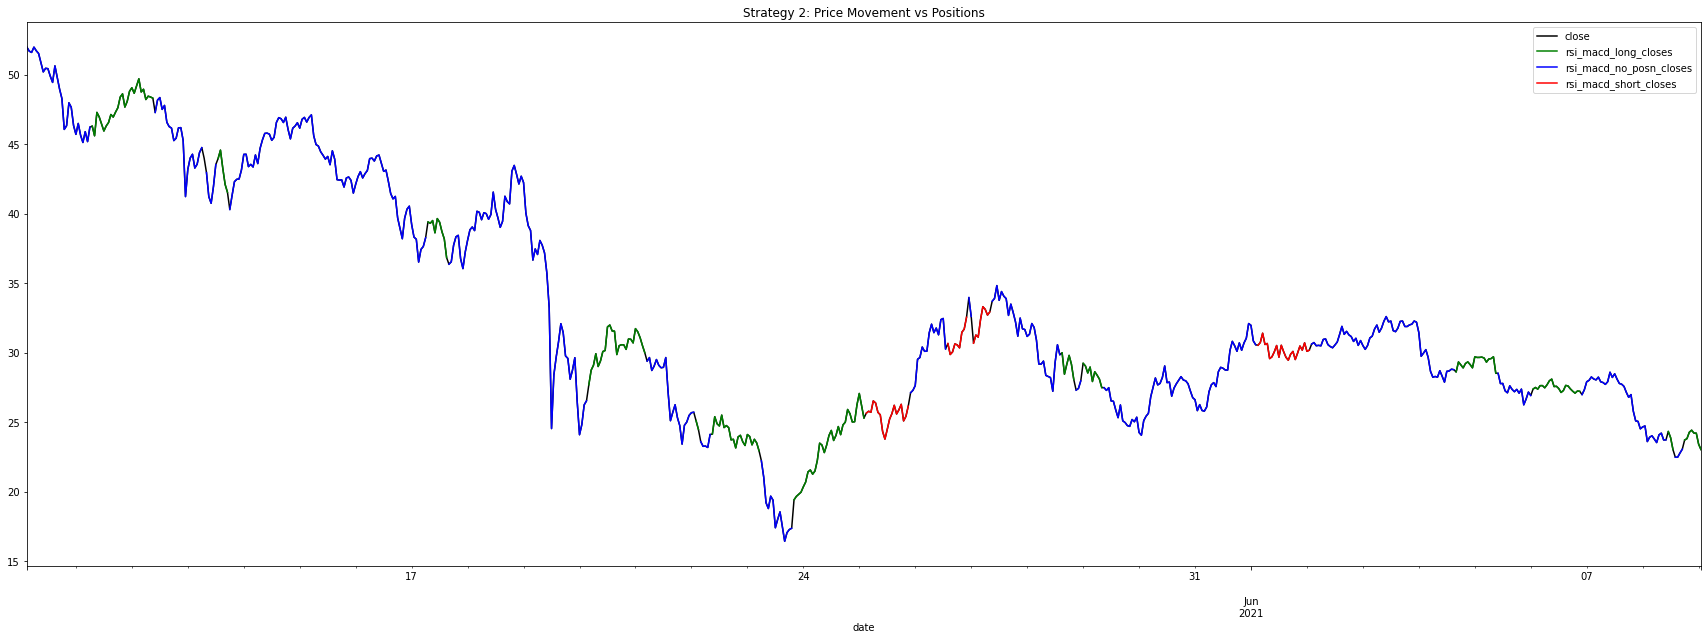

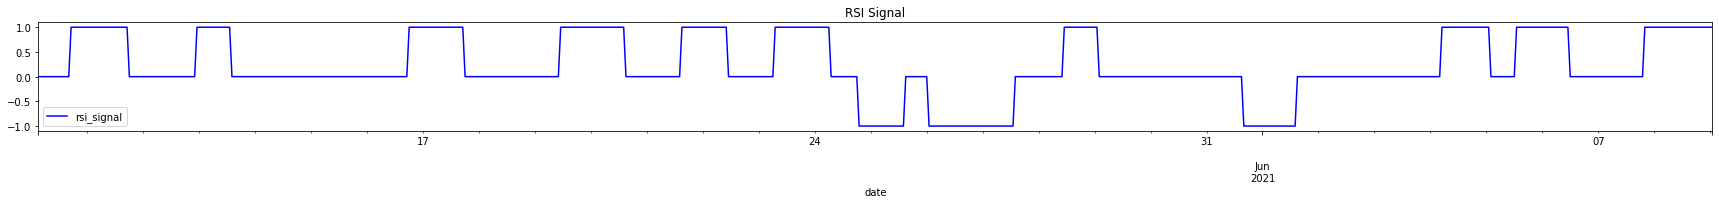

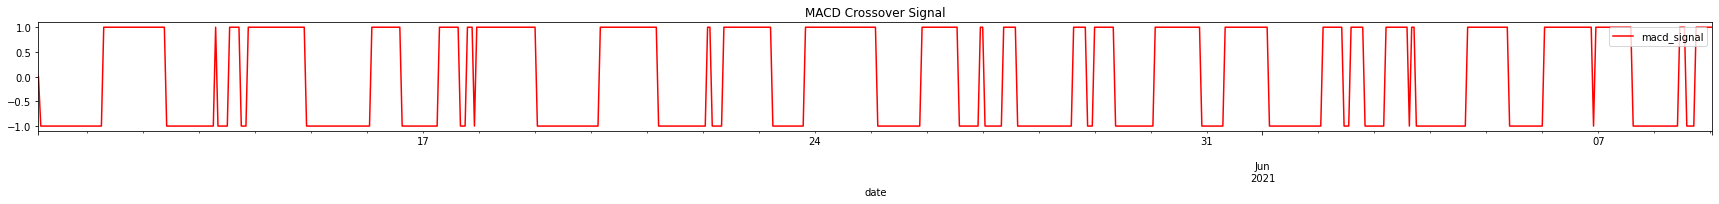

In [72]:
# PLOT IN MATPLOTLIB

display(strategy_2[['close', 'rsi_macd_long_closes', 'rsi_macd_no_posn_closes', 'rsi_macd_short_closes']].plot(figsize=(30,10), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 2: Price Movement vs Positions')
display(strategy_2[['rsi_signal']].plot(figsize=(30,2), color=['b']))
plt.title('RSI Signal')
display(strategy_2[['macd_signal']].plot(figsize=(30,2), color=['r']))
plt.title('MACD Crossover Signal')

## Strategy 3 - EMA50V200 + MACD

In [49]:
historical_prices_df[st3_x_var_list].iloc[550:570]
historical_prices_df.shape

(719, 55)

In [50]:
# Filter by x-variable list
strategy_3 = historical_prices_df[st3_x_var_list]

# Define long and short position conditions
strategy_3['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_3.iloc[509:528]
strategy_3['macd_signal_shift'] = strategy_3['macd_signal'].shift(1)

strategy_3.head(5)

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  
date                                                 
2021-05-10 03:00:00         Bull                NaN  
2021-05-10 04:00:00         Bear                0.0  
2021-05-10 05:00:00         Bear               -1.0  
2021-05-10 06:00:00         Bear               -1.0  
2021-05-10 07:00:00         Bear               -1.0

In [51]:
strategy_3.shape

(719, 5)

## Program the Conditional Logic for the Trading Strategy

In [52]:
st3_position_code = 0
st3_positions = []

for index, row in strategy_3.iterrows():
    
    # If EMA50v200 = 1 (BULL) and MACD CROSSES ABOVE SIGNAL (1) BUY
    if (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 1
        st3_positions.append(st3_position_code)


    # If EMA50v200 = 1 (BULL) and MACD CROSSES BELOW SIGNAL (-1) No Position
    elif (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)


    # If EMA50v200 = -1 (BEAR) and MACD CROSSES ABOVE SIGNAL (1) No Position
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)



    # If EMA50v200 = -1 (BEAR) and MACD CROSSES BELOW SIGNAL (-1) SELL
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = -1
        st3_positions.append(st3_position_code)


    # ELSE : 0 / NA
    else:
        st3_position_code = st3_position_code
        st3_positions.append(st3_position_code)

    

# Double check the dataframes have the same row lengths
display(len(st3_positions))
display(strategy_3.shape)
display(historical_prices_df.shape)    

719

(719, 5)

(719, 55)

In [53]:
strategy_3['ema50200_macd_position'] = st3_positions
historical_prices_df['st3_ema50200_macd_position'] = st3_positions
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  
date                                                                         
2021-05-10 03:00:00         Bull                NaN                       0  
2021-05-10 04:00:00         Bear                0.0                      -1  
2021-05-10 05:00:00         Bear               -1.0                      -1  
2021-05-10 06:00:00         Bear               -1.0                      -1  
2021-05-10 07:00:00         Bear               -1.0                      -1

### CALCULATE SIGNALS

In [54]:
strategy_3['ema50200_macd_position_shift'] = strategy_3['ema50200_macd_position'].shift(1)
strategy_3

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   
...                       ...                      ...          ...   
2021-06-08 21:00:00  24.41741                     -1.0          1.0   
2021-06-08 22:00:00  24.20817                     -1.0          1.0   
2021-06-08 23:00:00  24.20062                     -1.0          1.0   
2021-06-09 00:00:00  23.41281                     -1.0          1.0   
2021-06-09 01:00:00  23.02404                     -1.0          1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-10 03:00:00         Bull                NaN                       0   
2021-05-10 04:00:00         Bear                0.0                      -1   
2021-05-10 05:00:00         Bear               -1.0                      -1   
2021-05-10 06:00:00         Bear               -1.0                      -1   
2021-05-10 07:00:00         Bear               -1.0                      -1   
...                          ...                ...                     ...   
2021-06-08 21:00:00         Bear                1.0                       0   
2021-06-08 22:00:00         Bear                1.0                       0   
2021-06-08 23:00:00         Bear                1.0                       0   
2021-06-09 00:00:00         Bear                1.0                       0   
2021-06-09 01:00:00         Bear                1.0                       0   

                     ema50200_macd_position_shift  
date                                               
2021-05-10 03:00:00                           NaN  
2021-05-10 04:00:00                           0.0  
2021-05-10 05:00:00                          -1.0  
2021-05-10 06:00:00                          -1.0  
2021-05-10 07:00:00                          -1.0  
...                                           ...  
2021-06-08 21:00:00                           0.0  
2021-06-08 22:00:00                           0.0  
2021-06-08 23:00:00                           0.0  
2021-06-09 00:00:00                           0.0  
2021-06-09 01:00:00                           0.0  

[719 rows x 7 columns]

In [55]:
st3_signal_text = 'No Position - hold'
st3_signals = []

for index, row in strategy_3.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short'
        st3_signals.append(st3_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Close Long'
        st3_signals.append(st3_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'No Position - hold'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Sell Short'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Hold Short Position'
        st3_signals.append(st3_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = '‘Close Long Position, Enter short Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Hold Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short Position, Enter Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Enter Long Position'
        st3_signals.append(st3_signal_text)


    # Else, Signal = none
    else:
        st3_signal_text = st3_signal_text
        st3_signals.append(st3_signal_text)


strategy_3['ema50200_macd_signal'] = st3_signals
historical_prices_df['st3_rsi_macd_agg_signals'] = st3_signals
# strategy_3[0:50]
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-10 03:00:00         Bull                NaN                       0   
2021-05-10 04:00:00         Bear                0.0                      -1   
2021-05-10 05:00:00         Bear               -1.0                      -1   
2021-05-10 06:00:00         Bear               -1.0                      -1   
2021-05-10 07:00:00         Bear               -1.0                      -1   

                     ema50200_macd_position_shift ema50200_macd_signal  
date                                                                    
2021-05-10 03:00:00                           NaN   No Position - hold  
2021-05-10 04:00:00                           0.0           Sell Short  
2021-05-10 05:00:00                          -1.0  Hold Short Position  
2021-05-10 06:00:00                          -1.0  Hold Short Position  
2021-05-10 07:00:00                          -1.0  Hold Short Position

In [56]:
strategy_3['ema50v200_macd_long_closes'] = np.where(strategy_3['ema50200_macd_position'] == 1, strategy_3['close'], np.nan)
strategy_3['ema50v200_macd_no_posn_closes'] = np.where(strategy_3['ema50200_macd_position'] == 0, strategy_3['close'], np.nan)
strategy_3['ema50v200_macd_short_closes'] = np.where(strategy_3['ema50200_macd_position'] == -1, strategy_3['close'], np.nan)
# strategy_3[50:100]
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-10 03:00:00         Bull                NaN                       0   
2021-05-10 04:00:00         Bear                0.0                      -1   
2021-05-10 05:00:00         Bear               -1.0                      -1   
2021-05-10 06:00:00         Bear               -1.0                      -1   
2021-05-10 07:00:00         Bear               -1.0                      -1   

                     ema50200_macd_position_shift ema50200_macd_signal  \
date                                                                     
2021-05-10 03:00:00                           NaN   No Position - hold   
2021-05-10 04:00:00                           0.0           Sell Short   
2021-05-10 05:00:00                          -1.0  Hold Short Position   
2021-05-10 06:00:00                          -1.0  Hold Short Position   
2021-05-10 07:00:00                          -1.0  Hold Short Position   

                     ema50v200_macd_long_closes  \
date                                              
2021-05-10 03:00:00                         NaN   
2021-05-10 04:00:00                         NaN   
2021-05-10 05:00:00                         NaN   
2021-05-10 06:00:00                         NaN   
2021-05-10 07:00:00                         NaN   

                     ema50v200_macd_no_posn_closes  \
date                                                 
2021-05-10 03:00:00                       51.96999   
2021-05-10 04:00:00                            NaN   
2021-05-10 05:00:00                            NaN   
2021-05-10 06:00:00                            NaN   
2021-05-10 07:00:00                            NaN   

                     ema50v200_macd_short_closes  
date                                              
2021-05-10 03:00:00                          NaN  
2021-05-10 04:00:00                     51.68809  
2021-05-10 05:00:00                     51.60000  
2021-05-10 06:00:00                     51.98208  
2021-05-10 07:00:00                     51.72000

In [57]:

# _________________ BUILDING MAIN GRAPH YO _________________ #

# Visualize close price for the investment
price_closes = strategy_3[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_3['ema50v200_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_3['ema50v200_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_3['ema50v200_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# _________________ OTHER SIGNAL CODE _________________ #

ema50v200sig = historical_prices_df['crossover_signal_50v200'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

macd_sig = historical_prices_df['macd_signal'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

# _________________ CALLING THE GRAPHS SON _________________ #

entry_st3_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st3_exit_plot.opts(xaxis=None))
display(ema50v200sig.opts(xaxis=None))
display(macd_sig.opts(xaxis=None))

:Overlay
   .Curve.I                             :Curve   [date]   (close)
   .Curve.Ema50v200_macd_long_closes    :Curve   [date]   (ema50v200_macd_long_closes)
   .Curve.Ema50v200_macd_no_posn_closes :Curve   [date]   (ema50v200_macd_no_posn_closes)
   .Curve.Ema50v200_macd_short_closes   :Curve   [date]   (ema50v200_macd_short_closes)

:Curve   [date]   (crossover_signal_50v200)

:Curve   [date]   (macd_signal)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'MACD Crossover Signal')

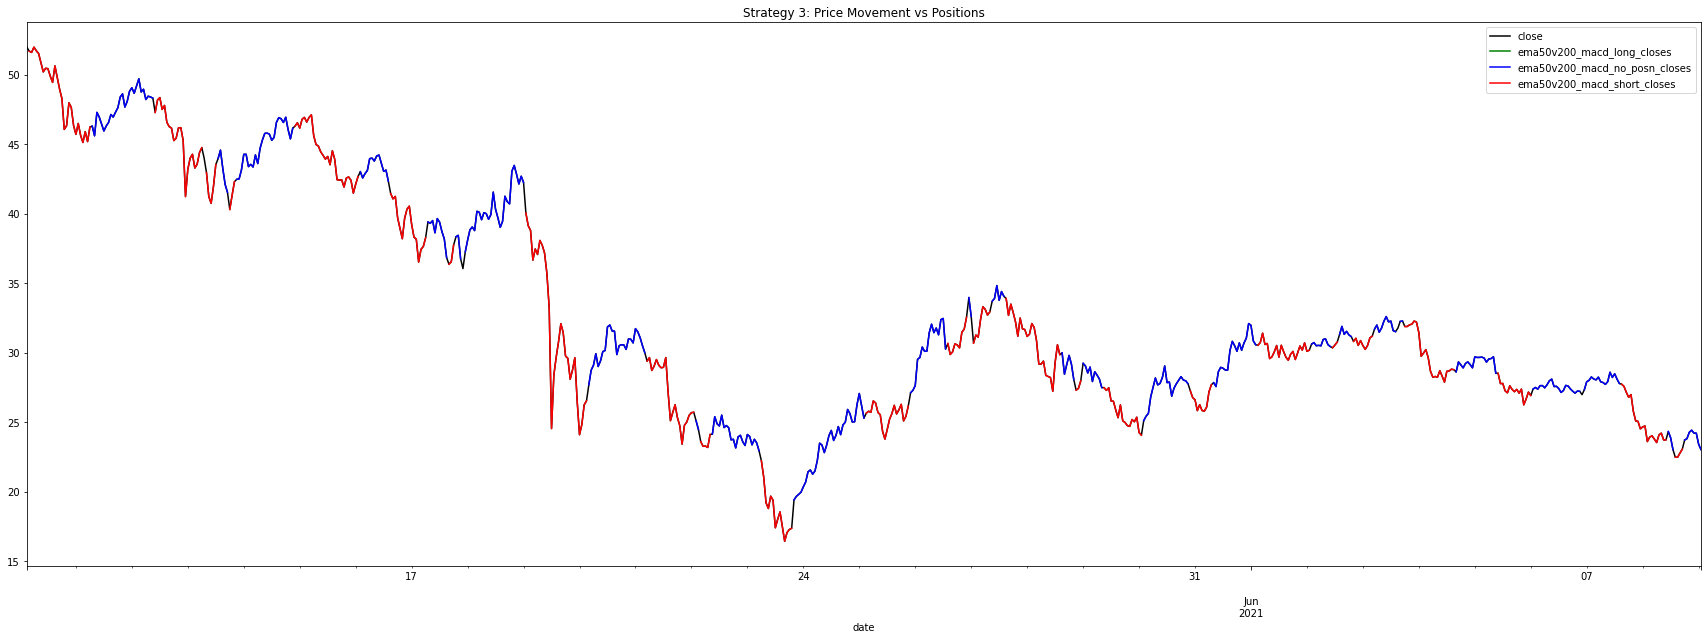

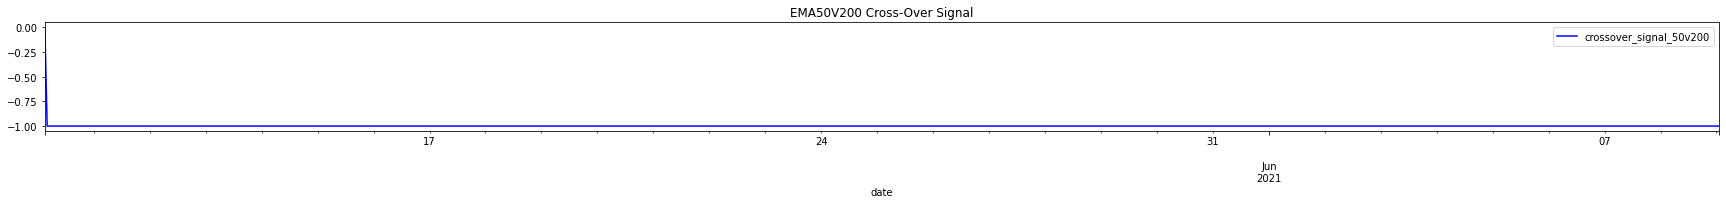

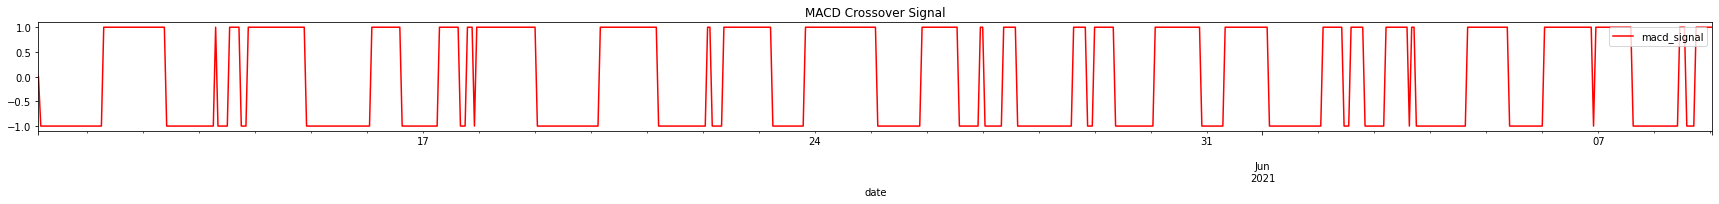

In [73]:
# PLOT IN MATPLOTLIB

display(strategy_3[['close', 'ema50v200_macd_long_closes', 'ema50v200_macd_no_posn_closes', 'ema50v200_macd_short_closes']].plot(figsize=(30,10), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 3: Price Movement vs Positions')
display(strategy_3[['crossover_signal_50v200']].plot(figsize=(30,2), color=['b']))
plt.title('EMA50V200 Cross-Over Signal')
display(strategy_3[['macd_signal']].plot(figsize=(30,2), color=['r']))
plt.title('MACD Crossover Signal')

## Strategy 4 - EMA200v50 + EMA200v50

In [58]:
# Filter by x-variable list
strategy_4 = historical_prices_df[st4_x_var_list]

# Define long and short position conditions
strategy_4['ema50v200_bull_or_bear'] = np.where(strategy_4['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_4.iloc[509:528]
strategy_4.tail(5)

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-06-08 21:00:00  24.41741                     -1.0                   -1.0   
2021-06-08 22:00:00  24.20817                     -1.0                   -1.0   
2021-06-08 23:00:00  24.20062                     -1.0                   -1.0   
2021-06-09 00:00:00  23.41281                     -1.0                   -1.0   
2021-06-09 01:00:00  23.02404                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  
date                                        
2021-06-08 21:00:00                   Bear  
2021-06-08 22:00:00                   Bear  
2021-06-08 23:00:00                   Bear  
2021-06-09 00:00:00                   Bear  
2021-06-09 01:00:00                   Bear

## Program the Conditional Logic for the Trading Strategy

In [59]:
# Istantiate variables 
st4_position_code = 0
st4_positions = []

for index, row in strategy_4.iterrows():


    # IF BEAR (50v200 = -1) AND EMA9v20 = 1 : NO POSITION (Position = 0)
    if (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # IF BEAR (50v200 = -1) AND EMA9v20 = -1 : SHORT (Position = -1)
    elif (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = -1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = 1 : LONG (Position = 1)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = -1 : NO POSITION (Position = 0)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # ELSE
    else:
        st4_position_code = st4_position_code
        st4_positions.append(st4_position_code)

# Double check the dataframes have the same row lengths
display(len(st4_positions))
display(strategy_4.shape)
display(historical_prices_df.shape)

719

(719, 4)

(719, 57)

In [60]:
strategy_4['st4_ema200v50_ema9v20'] = st4_positions
historical_prices_df['st4_st4_ema200v50_ema9v20'] = st4_positions
# strategy_4[130:170]
strategy_4[695:830]

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-06-08 02:00:00  23.59819                     -1.0                   -1.0   
2021-06-08 03:00:00  23.91422                     -1.0                   -1.0   
2021-06-08 04:00:00  24.01202                     -1.0                   -1.0   
2021-06-08 05:00:00  23.77886                     -1.0                   -1.0   
2021-06-08 06:00:00  23.52668                     -1.0                   -1.0   
2021-06-08 07:00:00  24.08114                     -1.0                   -1.0   
2021-06-08 08:00:00  24.20431                     -1.0                   -1.0   
2021-06-08 09:00:00  23.71481                     -1.0                   -1.0   
2021-06-08 10:00:00  23.71981                     -1.0                   -1.0   
2021-06-08 11:00:00  24.32365                     -1.0                   -1.0   
2021-06-08 12:00:00  23.87108                     -1.0                   -1.0   
2021-06-08 13:00:00  23.02143                     -1.0                   -1.0   
2021-06-08 14:00:00  22.46968                     -1.0                   -1.0   
2021-06-08 15:00:00  22.46928                     -1.0                   -1.0   
2021-06-08 16:00:00  22.77237                     -1.0                   -1.0   
2021-06-08 17:00:00  23.05031                     -1.0                   -1.0   
2021-06-08 18:00:00  23.70662                     -1.0                   -1.0   
2021-06-08 19:00:00  23.80893                     -1.0                   -1.0   
2021-06-08 20:00:00  24.26666                     -1.0                   -1.0   
2021-06-08 21:00:00  24.41741                     -1.0                   -1.0   
2021-06-08 22:00:00  24.20817                     -1.0                   -1.0   
2021-06-08 23:00:00  24.20062                     -1.0                   -1.0   
2021-06-09 00:00:00  23.41281                     -1.0                   -1.0   
2021-06-09 01:00:00  23.02404                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  
date                                                               
2021-06-08 02:00:00                   Bear                     -1  
2021-06-08 03:00:00                   Bear                     -1  
2021-06-08 04:00:00                   Bear                     -1  
2021-06-08 05:00:00                   Bear                     -1  
2021-06-08 06:00:00                   Bear                     -1  
2021-06-08 07:00:00                   Bear                     -1  
2021-06-08 08:00:00                   Bear                     -1  
2021-06-08 09:00:00                   Bear                     -1  
2021-06-08 10:00:00                   Bear                     -1  
2021-06-08 11:00:00                   Bear                     -1  
2021-06-08 12:00:00                   Bear                     -1  
2021-06-08 13:00:00                   Bear                     -1  
2021-06-08 14:00:00                   Bear                     -1  
2021-06-08 15:00:00                   Bear                     -1  
2021-06-08 16:00:00                   Bear                     -1  
2021-06-08 17:00:00                   Bear                     -1  
2021-06-08 18:00:00                   Bear                     -1  
2021-06-08 19:00:00                   Bear                     -1  
2021-06-08 20:00:00                   Bear                     -1  
2021-06-08 21:00:00                   Bear                     -1  
2021-06-08 22:00:00                   Bear                     -1  
2021-06-08 23:00:00                   Bear                     -1  
2021-06-09 00:00:00                   Bear                     -1  
2021-06-09 01:00:00                   Bear                     -1

In [61]:
strategy_4['st4_ema200v50_ema9v20_shift'] = strategy_4['st4_ema200v50_ema9v20'].shift(1)
strategy_4.head(5)

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-05-10 03:00:00  51.96999                      0.0                    0.0   
2021-05-10 04:00:00  51.68809                     -1.0                   -1.0   
2021-05-10 05:00:00  51.60000                     -1.0                   -1.0   
2021-05-10 06:00:00  51.98208                     -1.0                    1.0   
2021-05-10 07:00:00  51.72000                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  \
date                                                                
2021-05-10 03:00:00                   Bull                      0   
2021-05-10 04:00:00                   Bear                     -1   
2021-05-10 05:00:00                   Bear                     -1   
2021-05-10 06:00:00                   Bear                      0   
2021-05-10 07:00:00                   Bear                     -1   

                     st4_ema200v50_ema9v20_shift  
date                                              
2021-05-10 03:00:00                          NaN  
2021-05-10 04:00:00                          0.0  
2021-05-10 05:00:00                         -1.0  
2021-05-10 06:00:00                         -1.0  
2021-05-10 07:00:00                          0.0

In [62]:
st4_signal_text = 'No Position - hold'
st4_signals = []

for index, row in strategy_4.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short'
        st4_signals.append(st4_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Close Long'
        st4_signals.append(st4_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'No Position - hold'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Sell Short'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Hold Short Position'
        st4_signals.append(st4_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = '‘Close Long Position, Enter short Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Hold Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short Position, Enter Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Enter Long Position'
        st4_signals.append(st4_signal_text)


    # Else, Signal = none
    else:
        st4_signal_text = st4_signal_text
        st4_signals.append(st4_signal_text)


strategy_4['boll_ema50200_signals'] = st4_signals
historical_prices_df['st4_boll_ema50200_signals'] = st4_signals
# strategy_4[0:50]
strategy_4.head()

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-05-10 03:00:00  51.96999                      0.0                    0.0   
2021-05-10 04:00:00  51.68809                     -1.0                   -1.0   
2021-05-10 05:00:00  51.60000                     -1.0                   -1.0   
2021-05-10 06:00:00  51.98208                     -1.0                    1.0   
2021-05-10 07:00:00  51.72000                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  \
date                                                                
2021-05-10 03:00:00                   Bull                      0   
2021-05-10 04:00:00                   Bear                     -1   
2021-05-10 05:00:00                   Bear                     -1   
2021-05-10 06:00:00                   Bear                      0   
2021-05-10 07:00:00                   Bear                     -1   

                     st4_ema200v50_ema9v20_shift boll_ema50200_signals  
date                                                                    
2021-05-10 03:00:00                          NaN    No Position - hold  
2021-05-10 04:00:00                          0.0            Sell Short  
2021-05-10 05:00:00                         -1.0   Hold Short Position  
2021-05-10 06:00:00                         -1.0           Close Short  
2021-05-10 07:00:00                          0.0            Sell Short

In [63]:
strategy_4['rsi_macd_long_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == 1, strategy_4['close'], np.nan)
strategy_4['rsi_macd_no_posn_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == 0, strategy_4['close'], np.nan)
strategy_4['rsi_macd_short_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == -1, strategy_4['close'], np.nan)
strategy_4[50:100]

# ______________________ CODE FOR HV PLOTS MAIN GRAPH ______________________ #


# Visualize close price for the investment
price_closes = strategy_4[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_4['rsi_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_4['rsi_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_4['rsi_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______________________ OTHER SIGNALS CODE ______________________ #


em50v200sign = strategy_4['crossover_signal_50v200'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

em9v20sign = strategy_4['crossover_signal_9v20'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______________________ CALL PLOTS ______________________ #

entry_st2_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st2_exit_plot.opts(xaxis=None))
display(em50v200sign.opts(xaxis=None))
display(em9v20sign.opts(xaxis=None))


:Overlay
   .Curve.I                       :Curve   [date]   (close)
   .Curve.Rsi_macd_long_closes    :Curve   [date]   (rsi_macd_long_closes)
   .Curve.Rsi_macd_no_posn_closes :Curve   [date]   (rsi_macd_no_posn_closes)
   .Curve.Rsi_macd_short_closes   :Curve   [date]   (rsi_macd_short_closes)

:Curve   [date]   (crossover_signal_50v200)

:Curve   [date]   (crossover_signal_9v20)

In [64]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal
st1_boll_ema50200_position
st1_boll_ema50200_signals
st2_rsi_macd_agg_position
st2_rsi_macd_agg_signals
st3_ema50200_macd_position
st3_rsi_macd_agg_signals
st4_st4_ema200v50_ema9v20
st4_boll_ema50200_signals


# FROM THIS POINT ONWARDS, ALEX HASN'T DONE ANYTHING

### Shift the DataFrame Index by 1

In [65]:
# historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
# historical_prices_df[x_var_list].tail()

### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [66]:
# # Drop NAs and replace positive/negative infinity values
# historical_prices_df.dropna(subset=x_var_list, inplace=True)
# historical_prices_df.dropna(subset=['daily_return'], inplace=True)
# historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
# historical_prices_df.head()

### Construct the Dependent Variable

In [67]:
# historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
# historical_prices_df.head()

### Assign Training and Testing Windows